In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
X=pd.read_csv('/content/drive/MyDrive/DS Test/Training/X_train.csv')

In [42]:
y=pd.read_csv('/content/drive/MyDrive/DS Test/Training/y_train.csv')
y.head()

Unique_ID  Dependent_Variable
0   Candidate_5926                   1
1  Candidate_48134                   0
2  Candidate_51717                   1
3  Candidate_26401                   0
4  Candidate_34872                   0

In [43]:
train=pd.merge(X,y,on='Unique_ID')

In [ ]:
train.head()

In [ ]:
train.shape

(33050, 45)

In [ ]:
train['Dependent_Variable'].value_counts()

0    22844
1    10206
Name: Dependent_Variable, dtype: int64

In [ ]:
train.isnull().sum()

Unique_ID                 0
C1                        0
C2                        0
C3                        0
C4                        0
C5                        0
C6                        0
C7                        0
C8                        0
N1                        0
N2                     4612
N3                      365
N4                     4606
N5                     4606
N6                      365
N7                      427
N8                        0
N9                        0
N10                     427
N10.1                   427
N11                     716
N12                    4614
N14                     608
N15                     427
N16                    4606
N17                    4606
N18                    4606
N19                    4571
N20                    4571
N21                    4571
N22                    4571
N23                    2486
N24                       0
N25                   26779
N26                   26779
N27                 

In [ ]:
ree=[str('N')+str(i) for i in range(25,33)]
ree
train.drop(ree,axis=1,inplace=True)

In [ ]:
train=train.fillna(train.median())


<ipython-input-11-4efbd2921d57>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train=train.fillna(train.median())


In [ ]:
train.isna().sum()

Unique_ID             0
C1                    0
C2                    0
C3                    0
C4                    0
C5                    0
C6                    0
C7                    0
C8                    0
N1                    0
N2                    0
N3                    0
N4                    0
N5                    0
N6                    0
N7                    0
N8                    0
N9                    0
N10                   0
N10.1                 0
N11                   0
N12                   0
N14                   0
N15                   0
N16                   0
N17                   0
N18                   0
N19                   0
N20                   0
N21                   0
N22                   0
N23                   0
N24                   0
N33                   0
N34                   0
N35                   0
Dependent_Variable    0
dtype: int64

<Axes: >

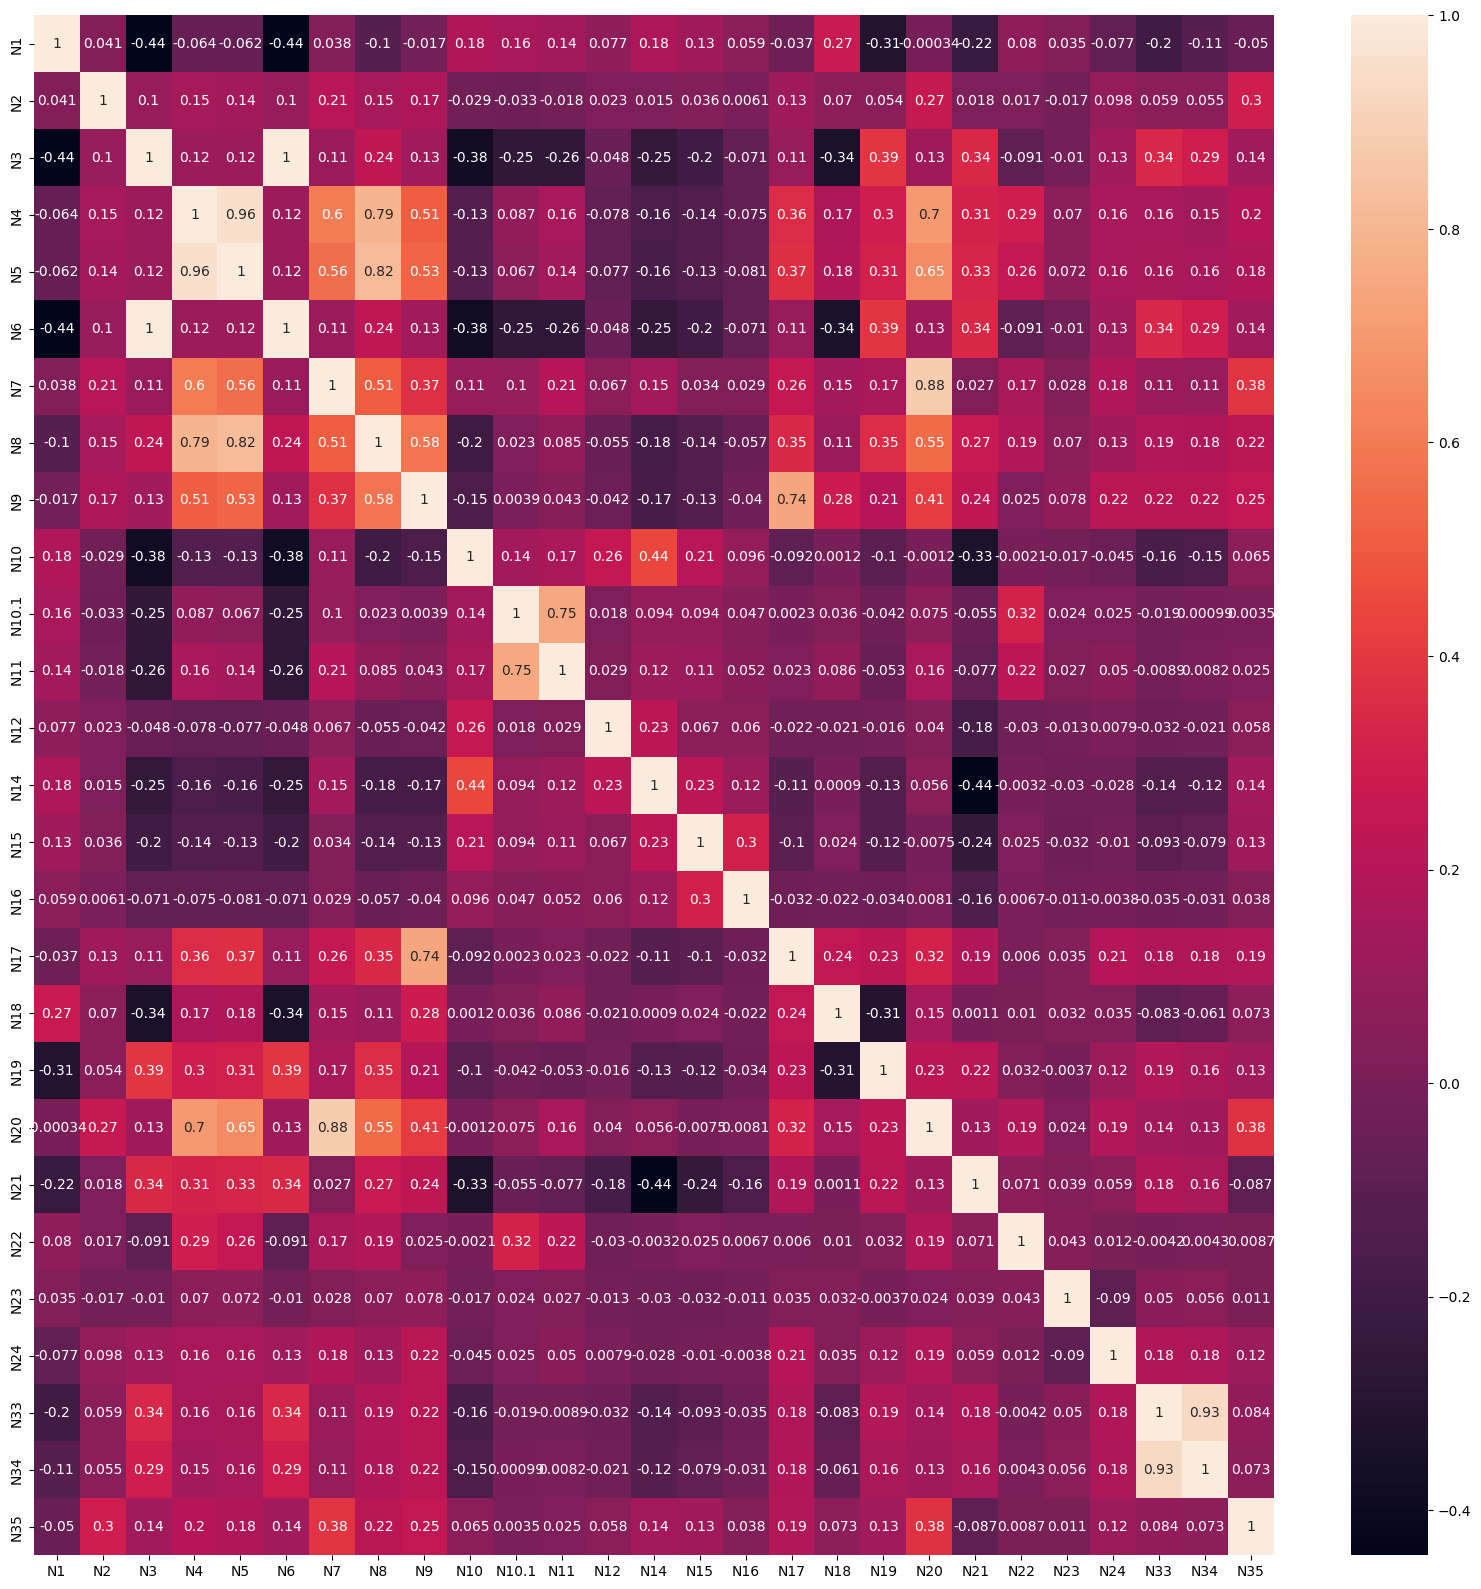

In [ ]:
N=[i for i in train.columns if i[0]=='N' ]
c=[i for i in train.columns if i[0]=='C']
plt.figure(figsize=(20,20))
sns.heatmap(train[N].corr(),annot=True)


In [ ]:
N

['N1',
 'N2',
 'N3',
 'N4',
 'N5',
 'N6',
 'N7',
 'N8',
 'N9',
 'N10',
 'N10.1',
 'N11',
 'N12',
 'N14',
 'N15',
 'N16',
 'N17',
 'N18',
 'N19',
 'N20',
 'N21',
 'N22',
 'N23',
 'N24',
 'N33',
 'N34',
 'N35']

<Axes: xlabel='N1', ylabel='N35'>

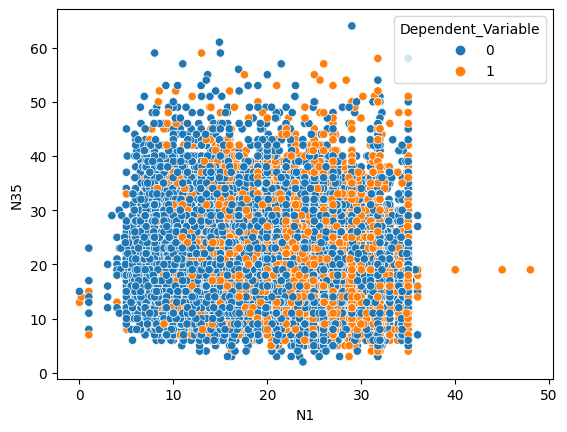

In [ ]:
sns.scatterplot(data=train,x='N1',y='N35',hue='Dependent_Variable')

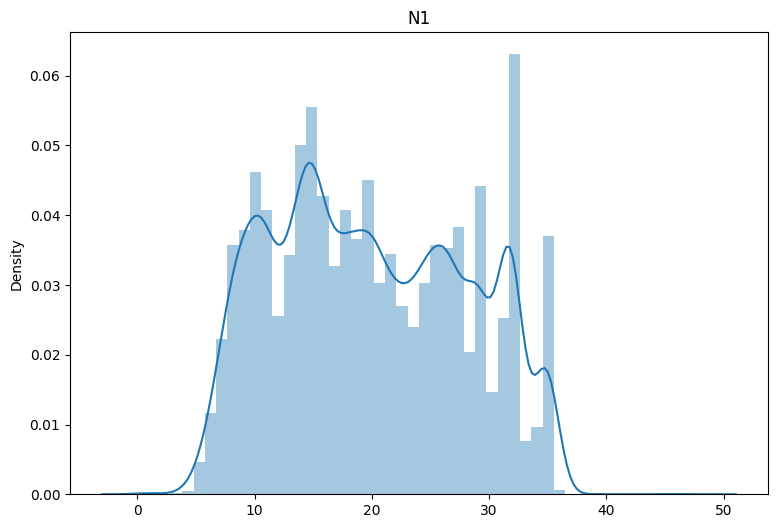

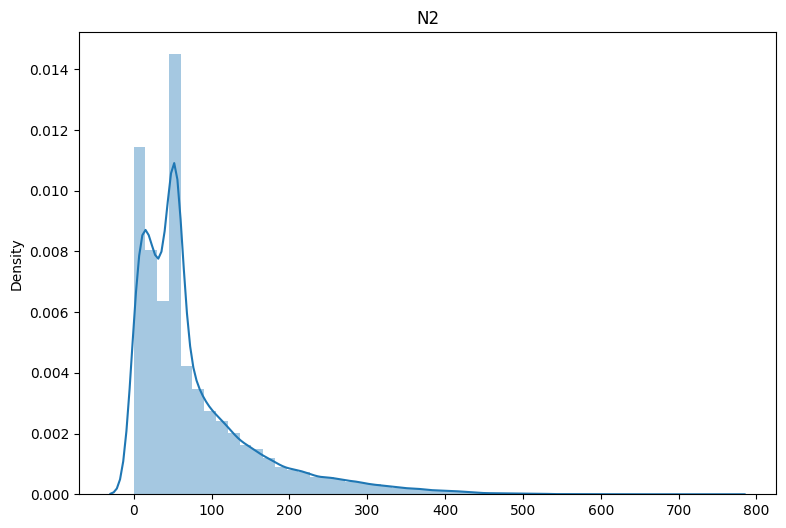

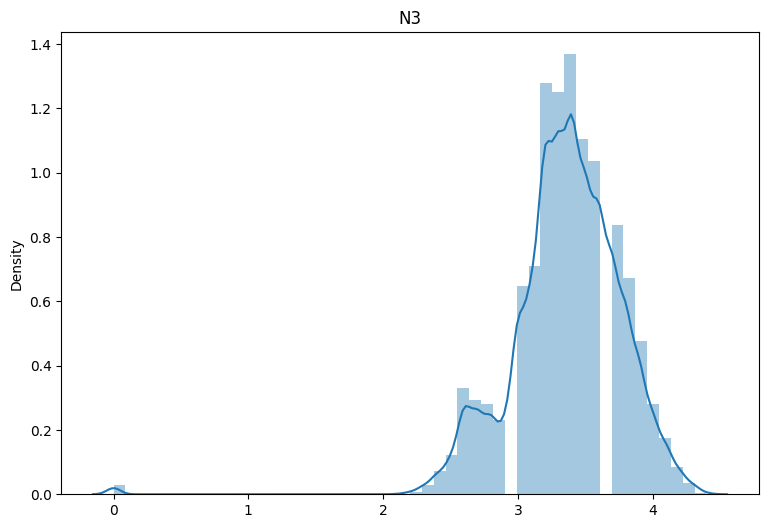

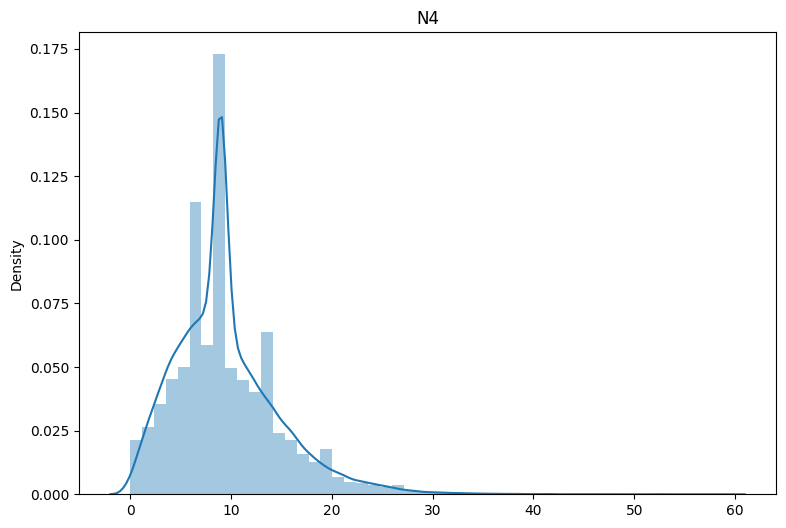

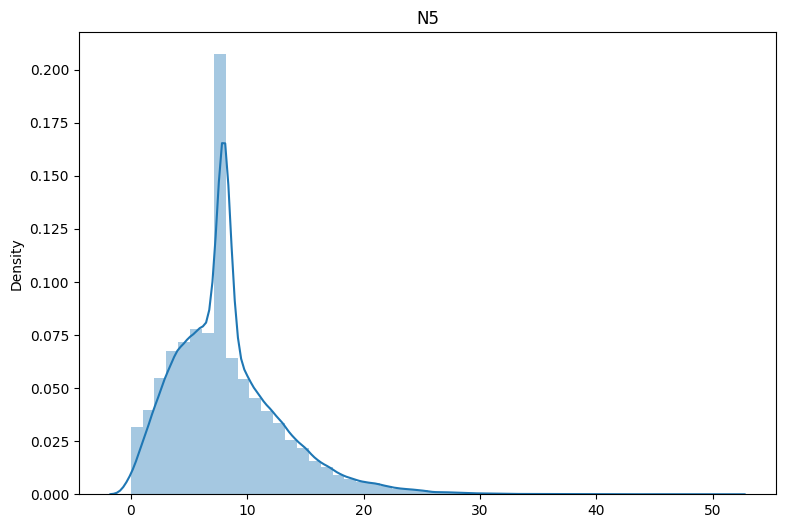

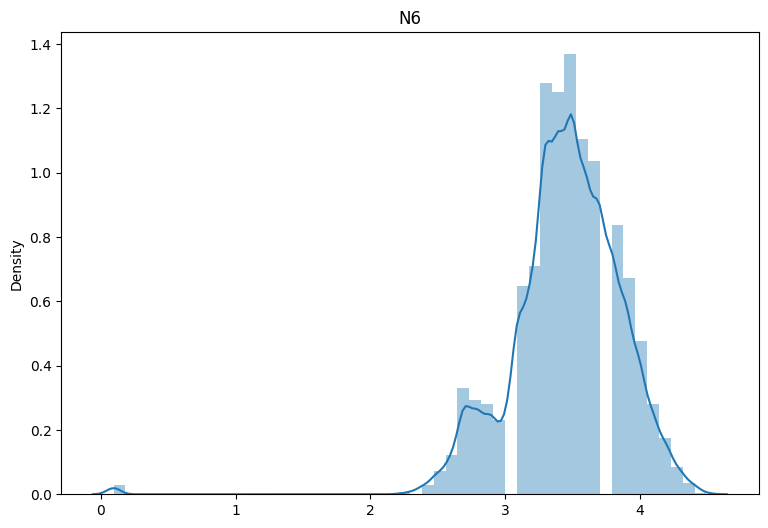

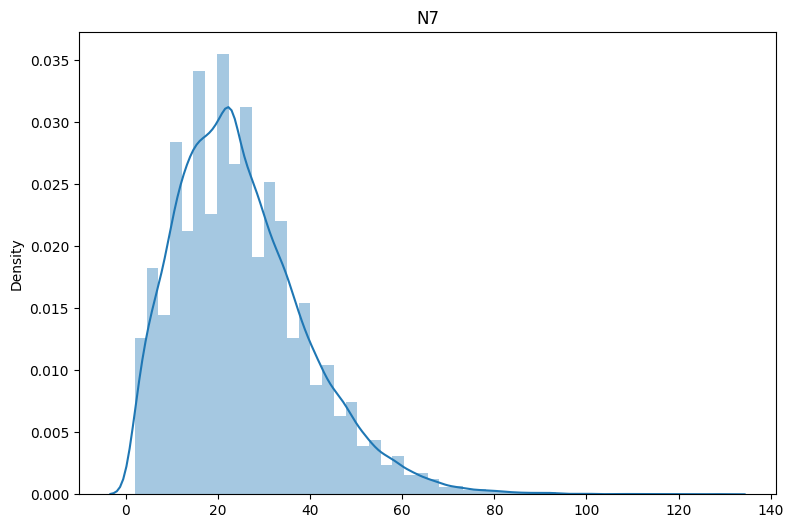

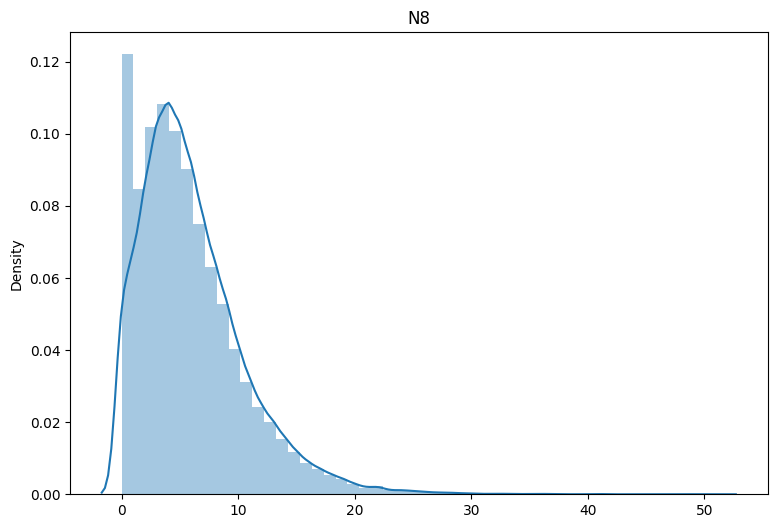

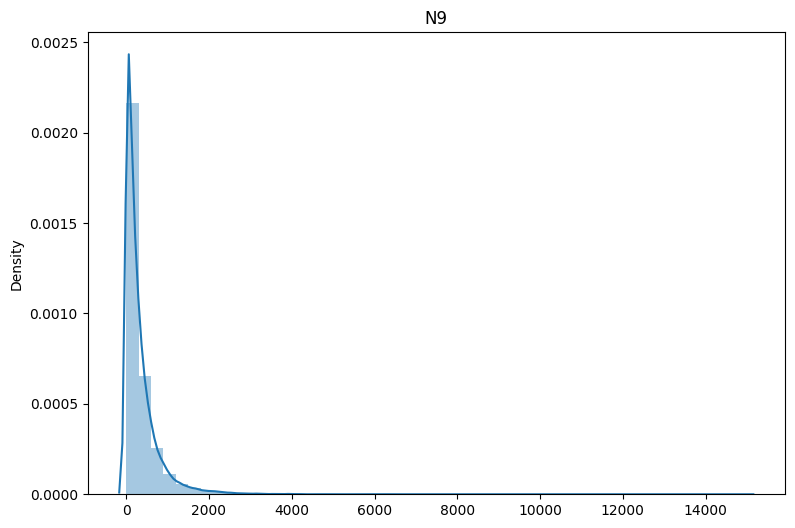

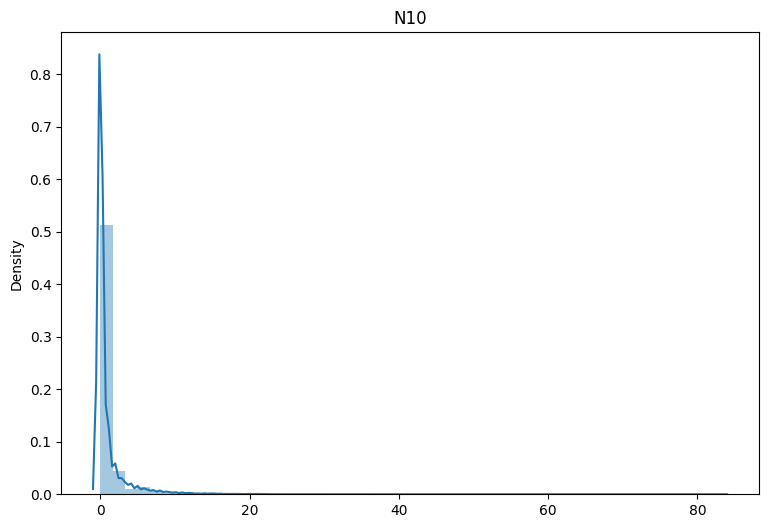

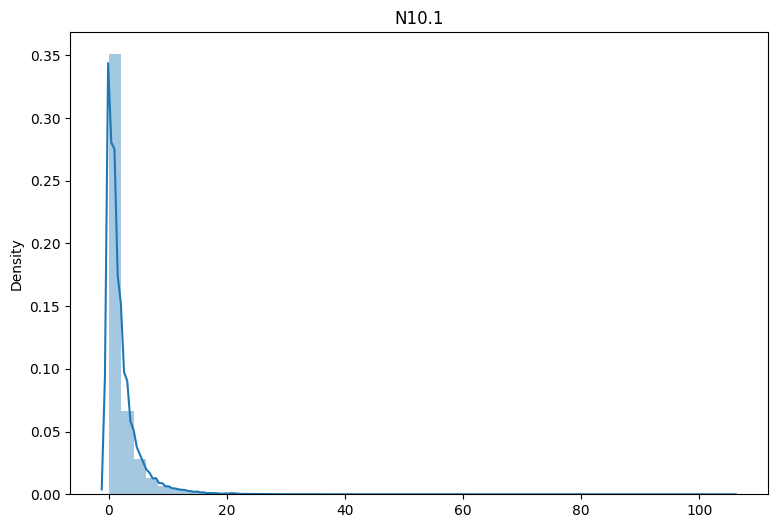

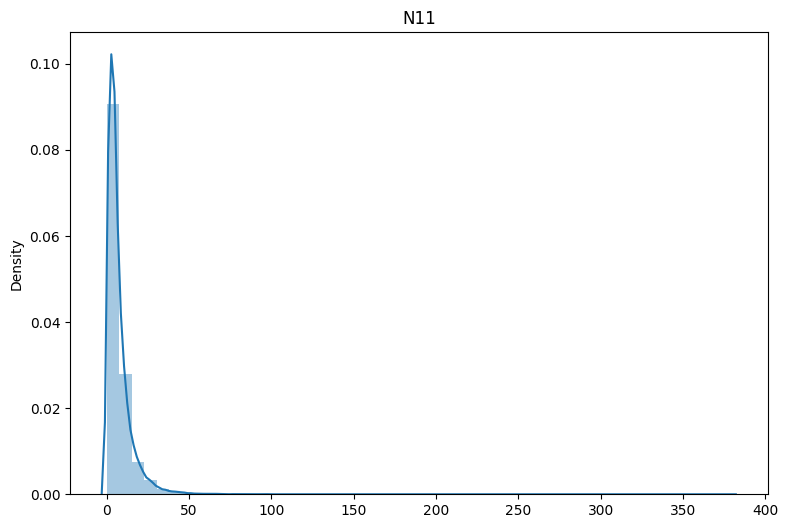

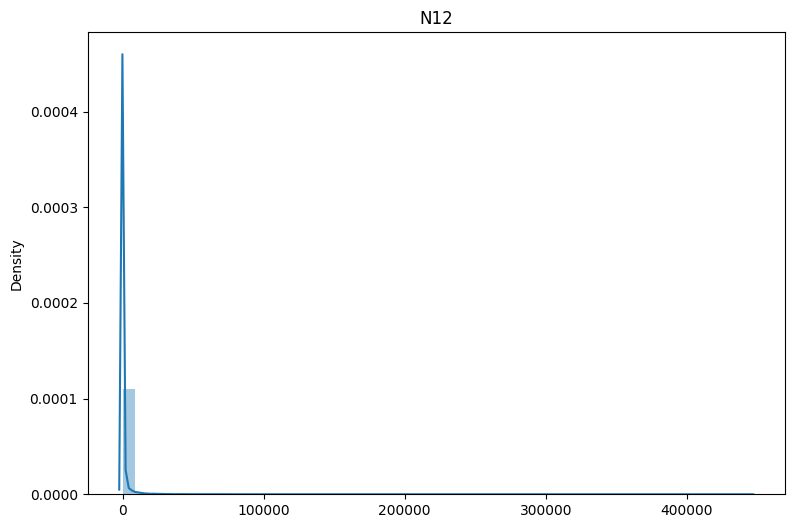

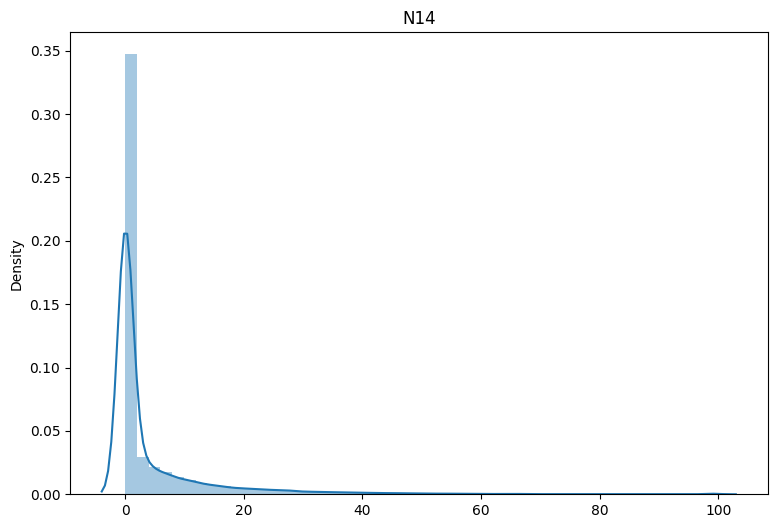

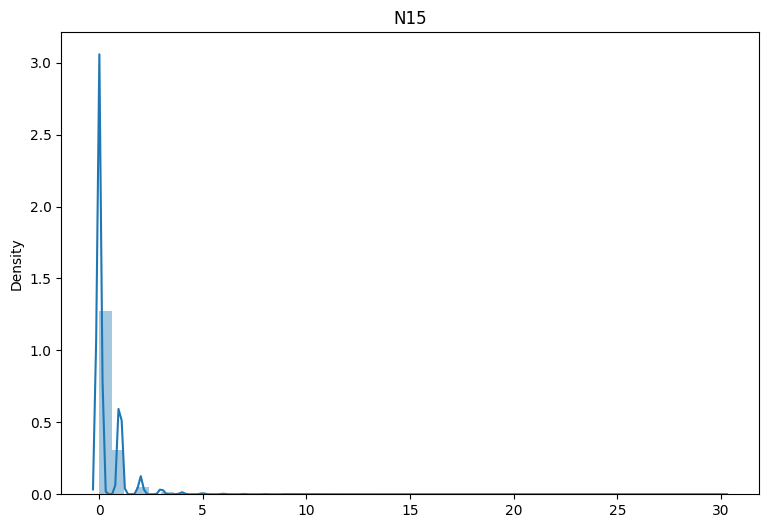

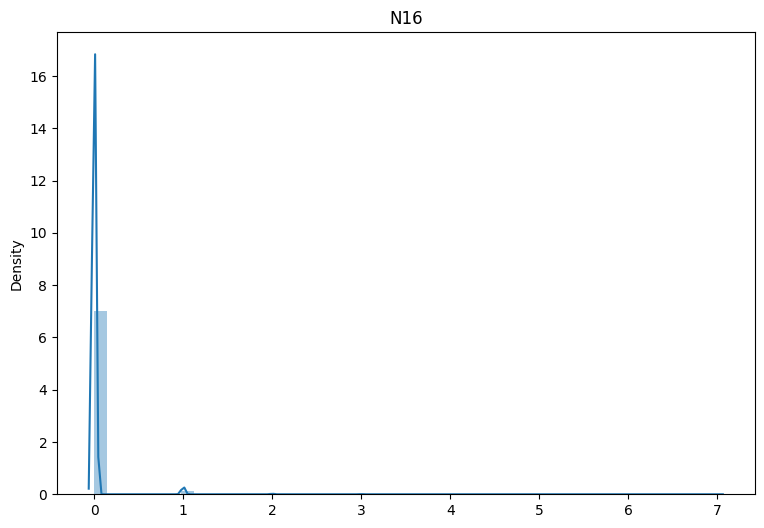

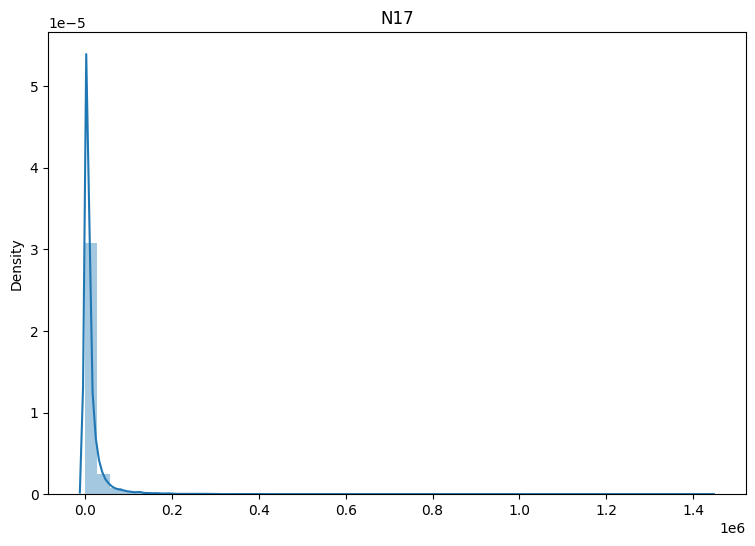

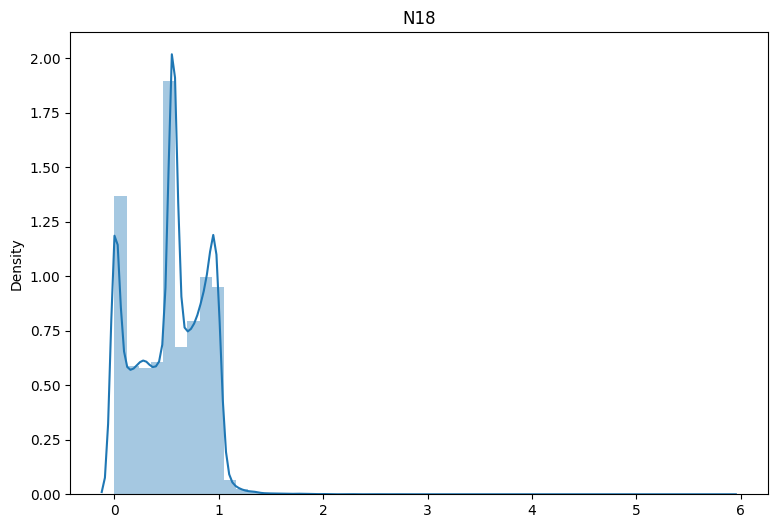

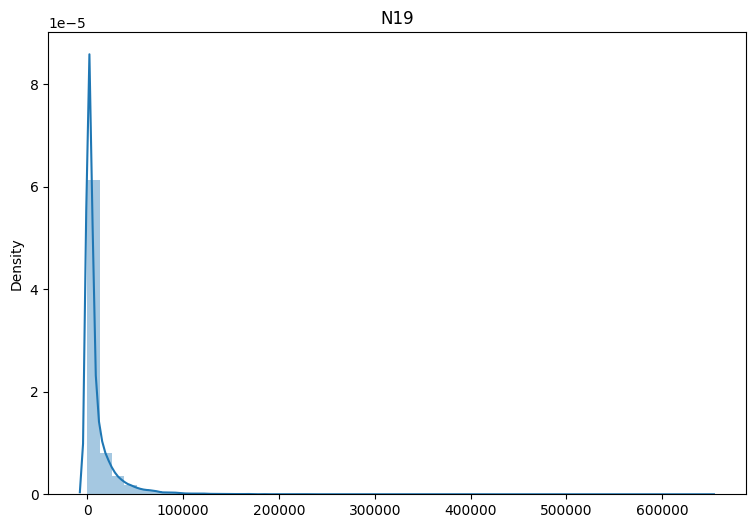

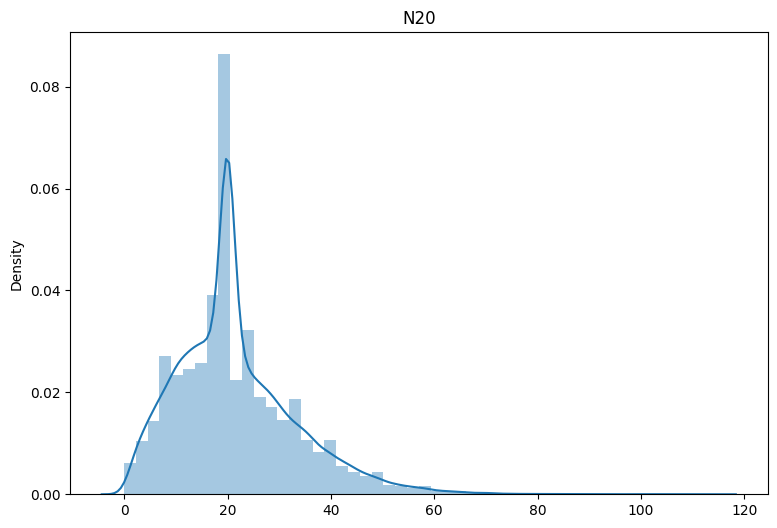

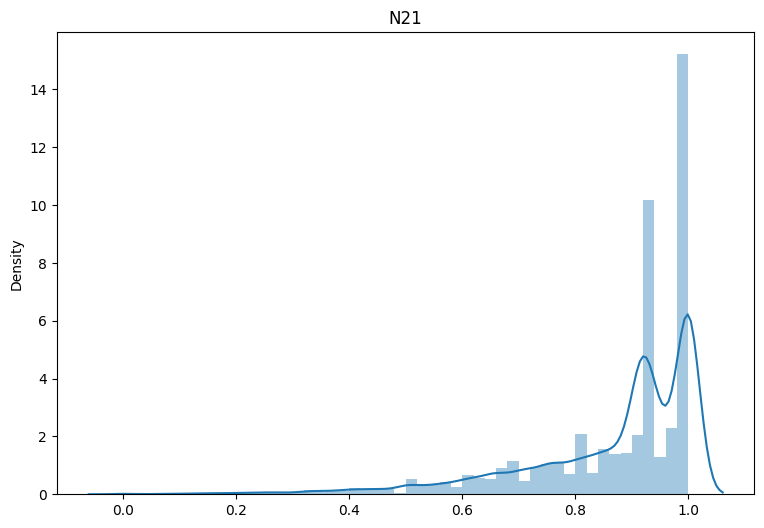

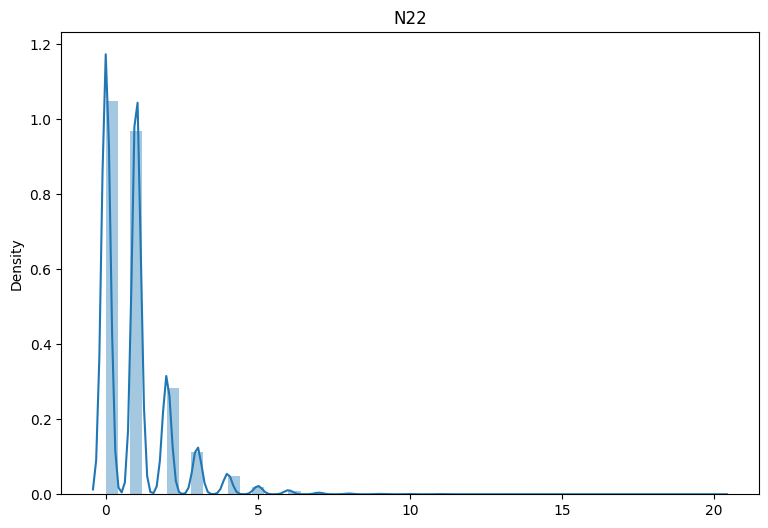

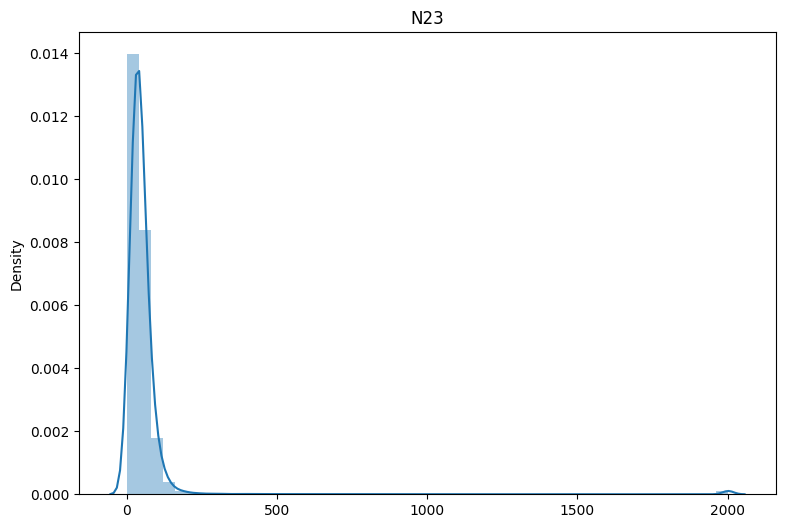

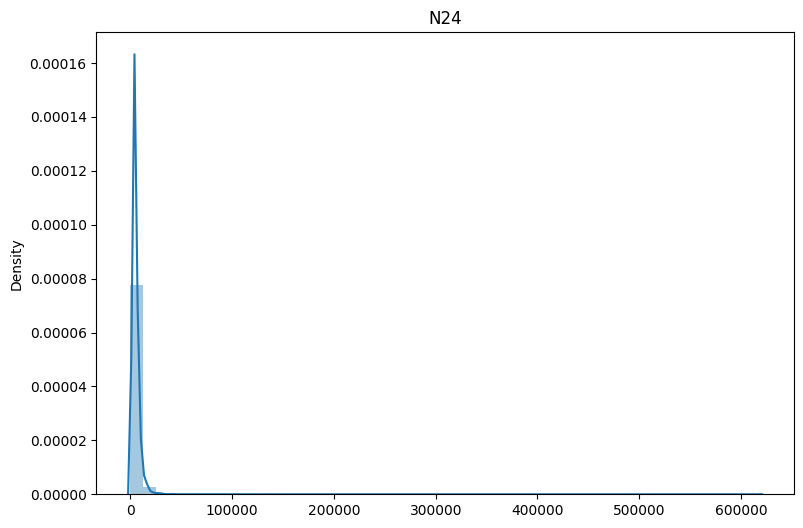

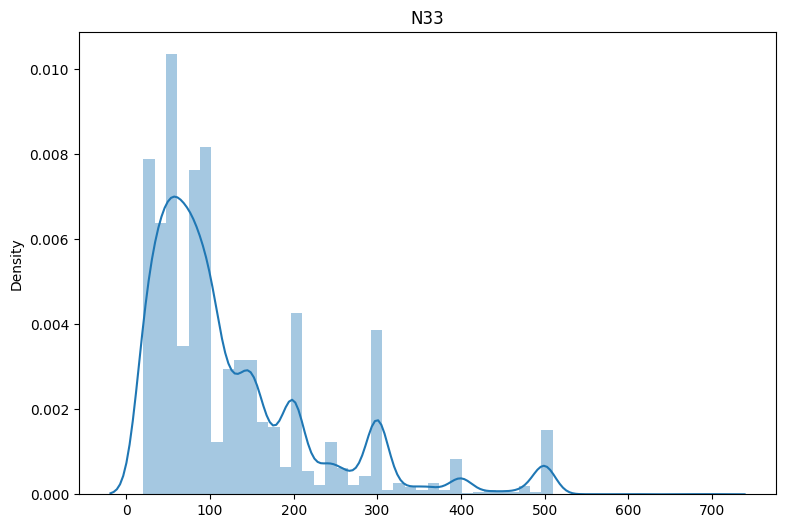

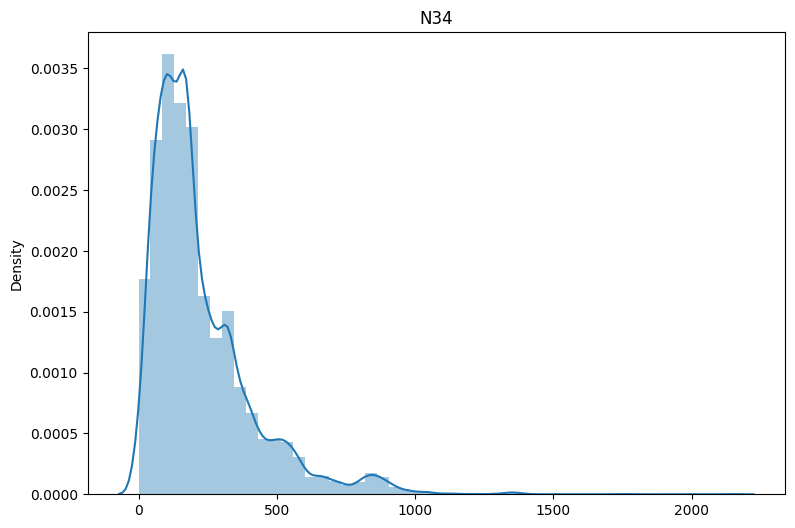

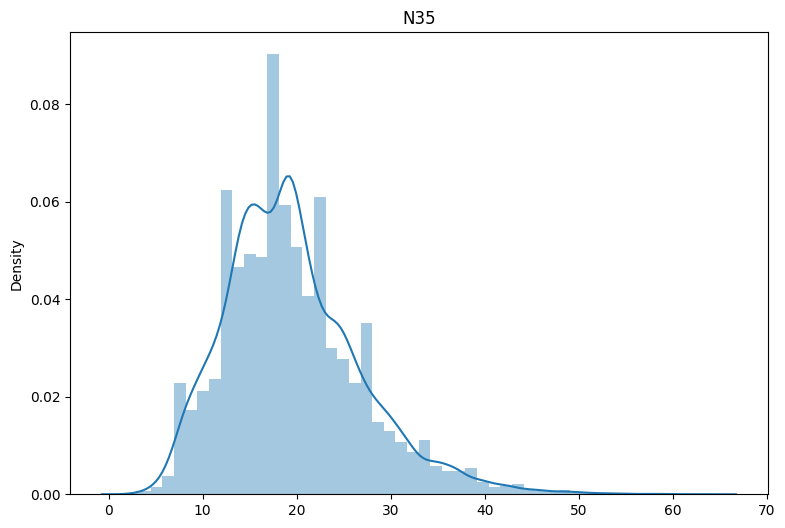

In [ ]:
import warnings
warnings.filterwarnings('ignore')

for col in N:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.distplot(x=train[col]).set(title=col)


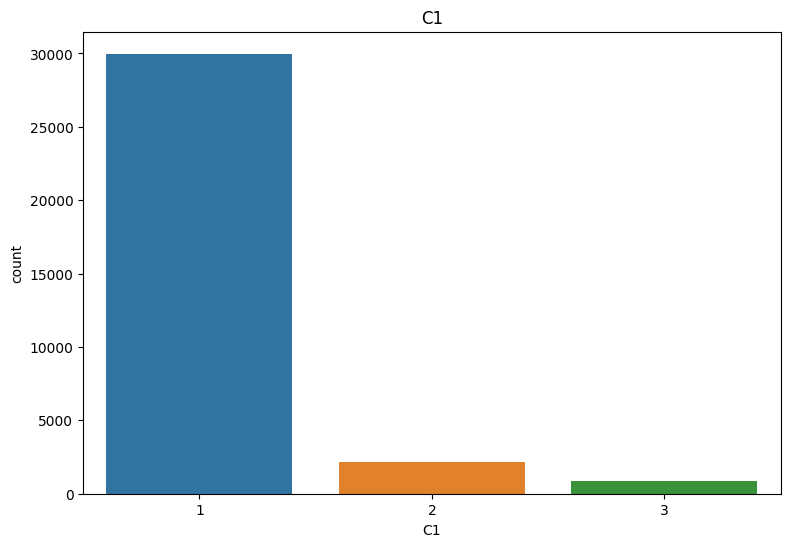

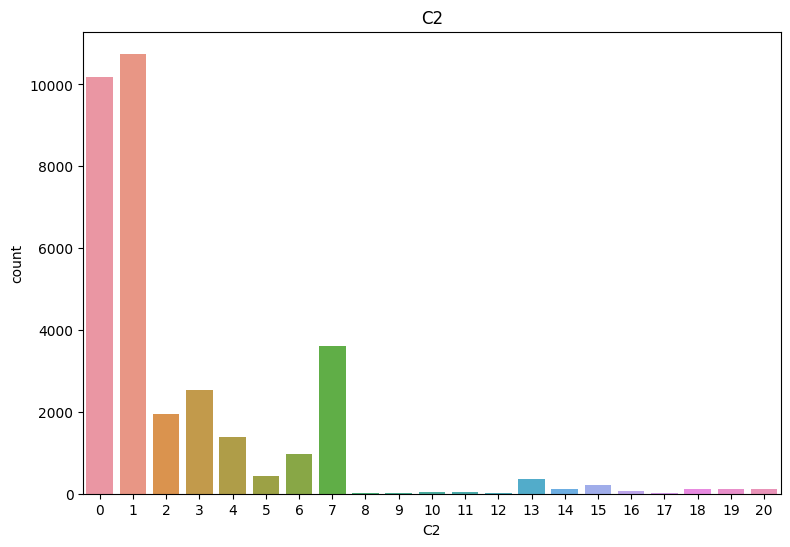

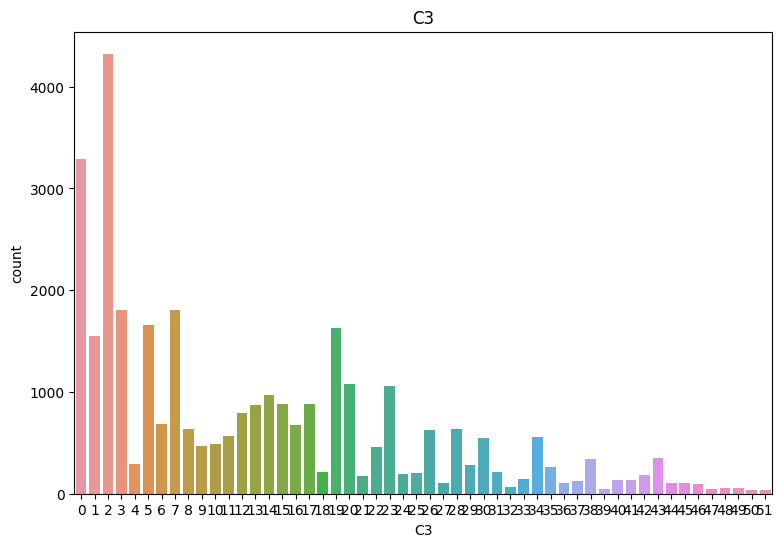

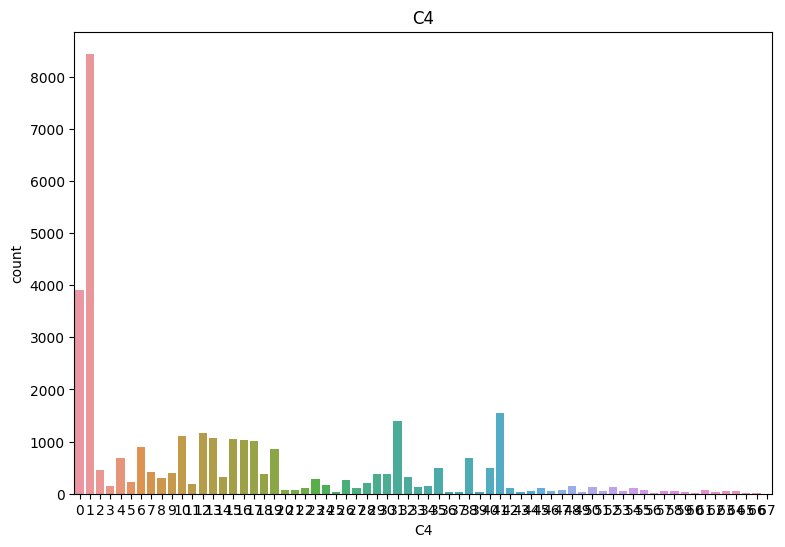

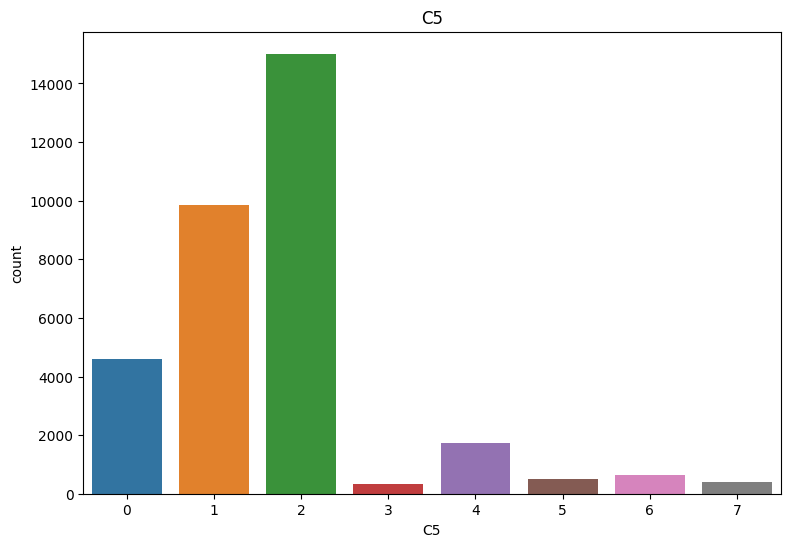

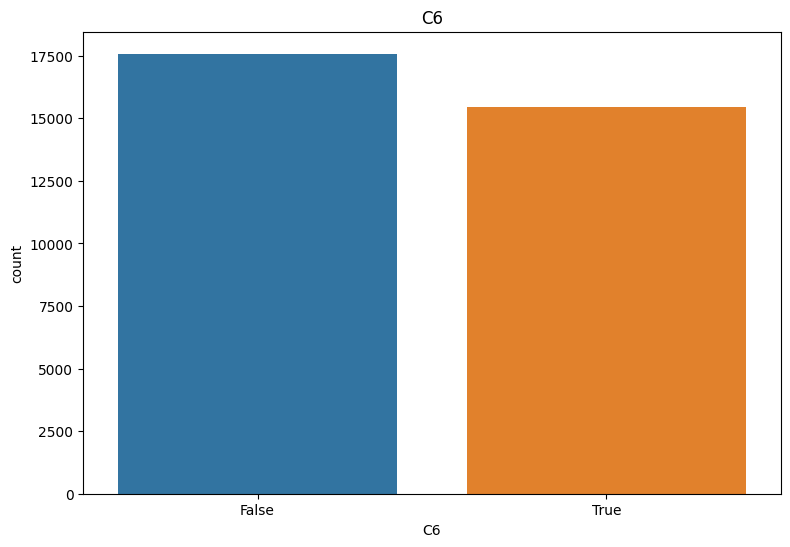

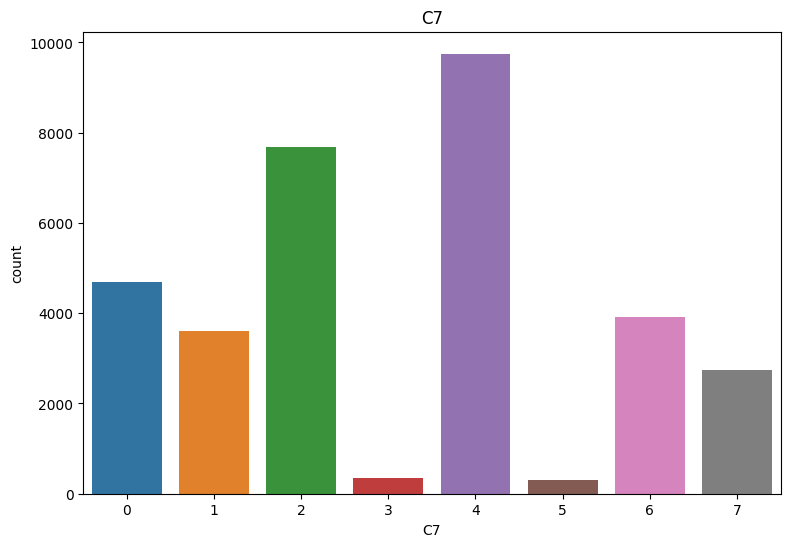

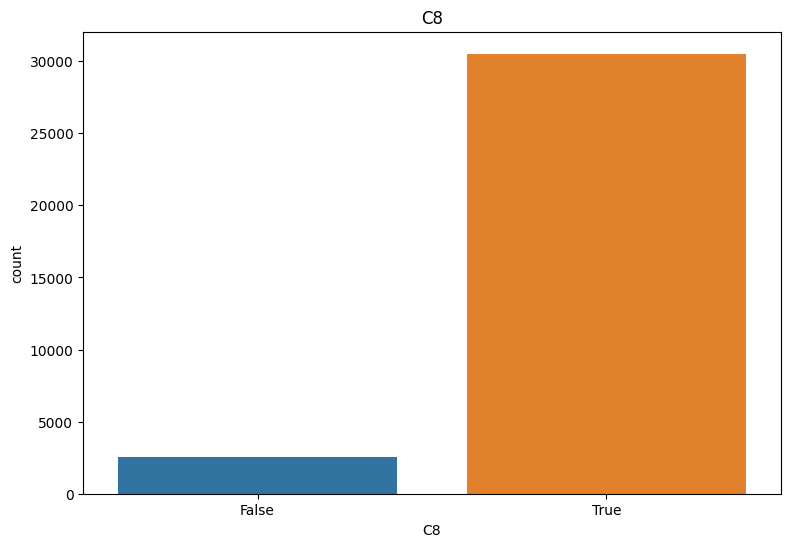

In [ ]:
import warnings
warnings.filterwarnings('ignore')

for col in c:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.countplot(x=train[col]).set(title=col)


In [ ]:
# sns.pairplot(data=train[N+['Dependent_Variable']],hue='Dependent_Variable')

<Axes: >

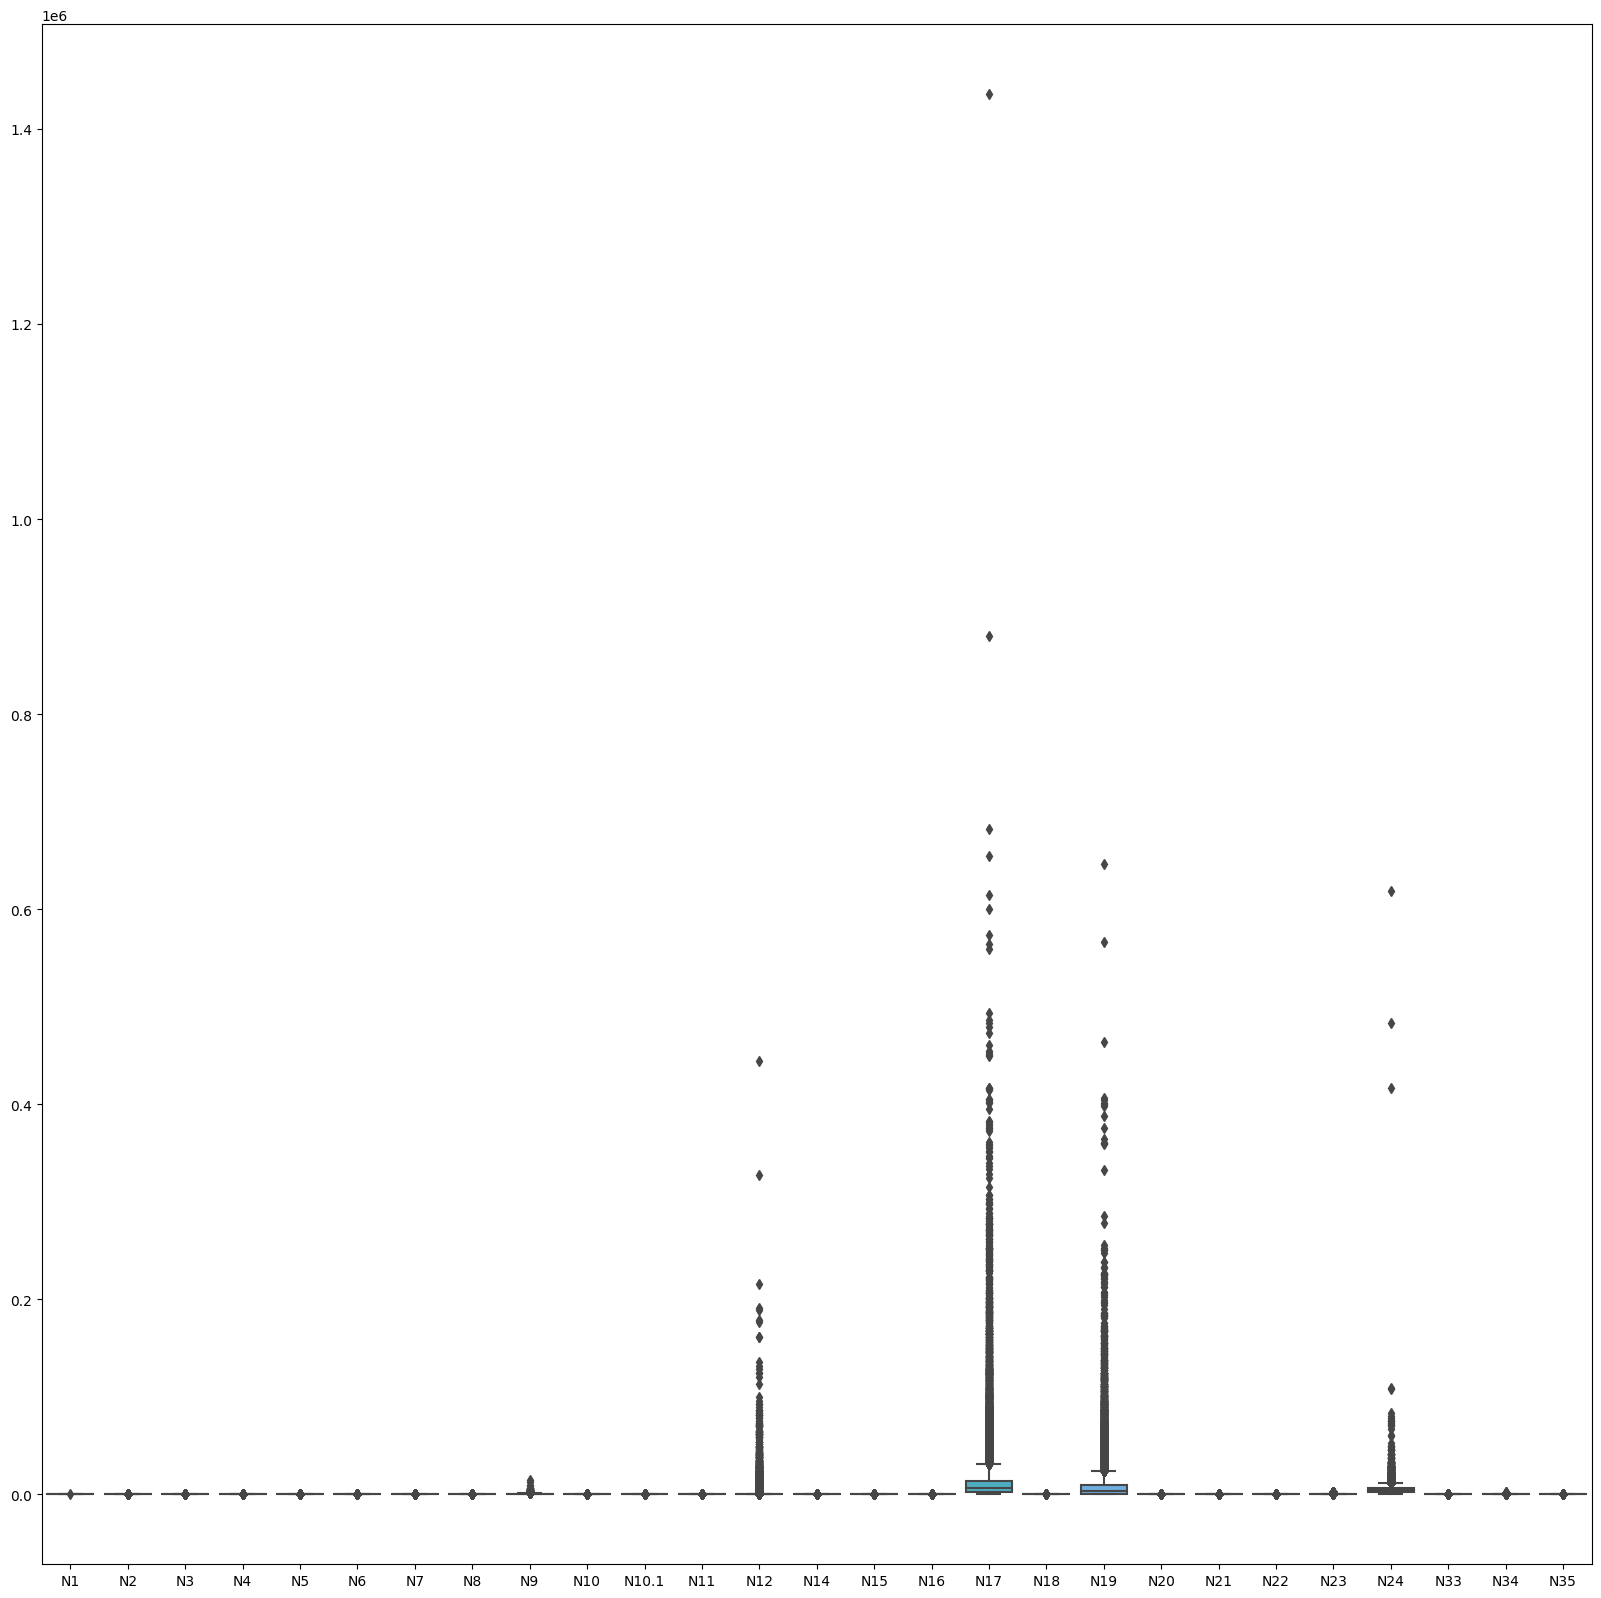

In [ ]:

plt.figure(figsize=(20,20))
sns.boxplot(train[N])


In [ ]:
def outlier_capping(col):
  q1=np.percentile(col,25)
  q3=np.percentile(col,75)
  iqr=q3-q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  re=[]
  for i in col:
    if i>upper_bound:
      re.append(upper_bound)
    elif i<lower_bound:
      re.append(lower_bound)
    else:
      re.append(i)
  return re
for i in N:
  train[i]=outlier_capping(train[i])

<Axes: >

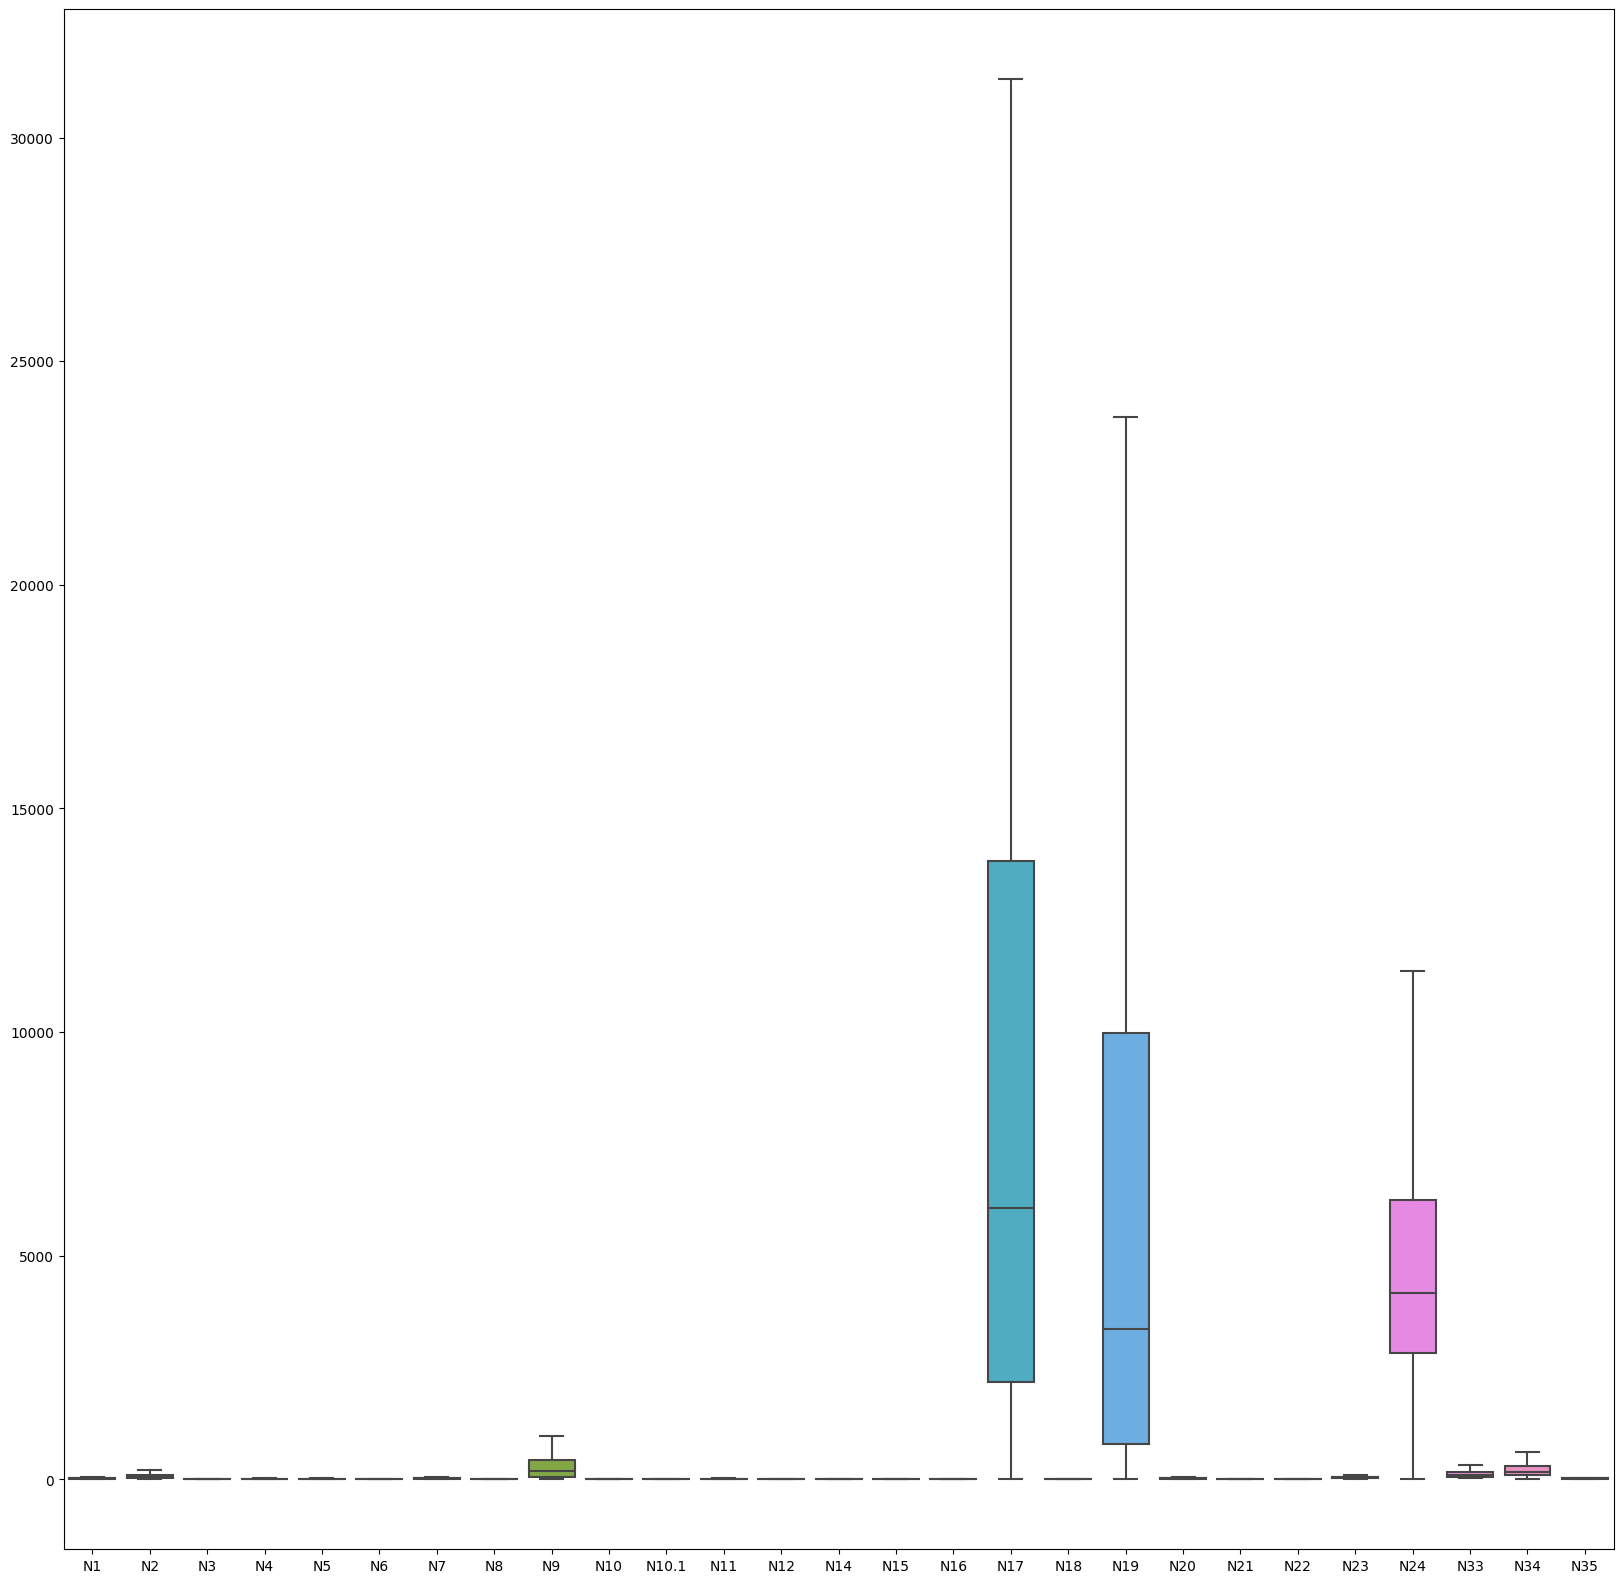

In [ ]:

plt.figure(figsize=(20,20))
sns.boxplot(train[N])


In [ ]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):

    X = train[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif
compute_vif(N)


Variable        VIF
0        N1   1.542231
1        N2   1.180774
2        N3        inf
3        N4  12.697830
4        N5  12.986474
5        N6        inf
6        N7   5.191656
7        N8   4.193816
8        N9   5.539151
9       N10   1.715888
10    N10.1   2.222996
11      N11   2.287196
12      N12        NaN
13      N14   1.848187
14      N15        NaN
15      N16        NaN
16      N17   4.782230
17      N18   2.121914
18      N19   2.509448
19      N20   6.084311
20      N21   1.769548
21      N22   1.272038
22      N23   1.847046
23      N24   1.947256
24      N33  10.660148
25      N34  10.400772
26      N35   1.404048

In [ ]:
# N3 Drop
N.remove('N3')
compute_vif(N).sort_values('VIF', ascending=False)


Variable        VIF
3        N5  12.986474
2        N4  12.697830
23      N33  10.660148
24      N34  10.400772
18      N20   6.084311
7        N9   5.539151
5        N7   5.191656
15      N17   4.782230
6        N8   4.193816
4        N6   2.722652
17      N19   2.509448
10      N11   2.287196
9     N10.1   2.222996
16      N18   2.121914
22      N24   1.947256
12      N14   1.848187
21      N23   1.847046
19      N21   1.769548
8       N10   1.715888
0        N1   1.542231
25      N35   1.404048
20      N22   1.272038
1        N2   1.180774
11      N12        NaN
13      N15        NaN
14      N16        NaN

In [ ]:
# N5 Drop
N.remove('N5')
compute_vif(N).sort_values('VIF', ascending=False)


Variable        VIF
22      N33  10.658386
23      N34  10.396949
17      N20   6.083932
6        N9   5.518636
4        N7   5.169226
14      N17   4.759272
2        N4   4.421268
5        N8   3.718343
3        N6   2.717568
16      N19   2.496817
9       N11   2.287045
8     N10.1   2.220129
15      N18   2.115214
21      N24   1.927575
11      N14   1.846029
20      N23   1.835349
18      N21   1.746047
7       N10   1.696536
0        N1   1.541382
24      N35   1.402014
19      N22   1.271744
1        N2   1.180774
10      N12        NaN
12      N15        NaN
13      N16        NaN

In [ ]:
# N5 Drop
N.remove('N33')
compute_vif(N).sort_values('VIF', ascending=False)


Variable       VIF
17      N20  6.083089
6        N9  5.518636
4        N7  5.169091
14      N17  4.759259
2        N4  4.421126
5        N8  3.718146
3        N6  2.715696
16      N19  2.493962
9       N11  2.287017
8     N10.1  2.219503
15      N18  2.115069
21      N24  1.926395
11      N14  1.845950
20      N23  1.833648
18      N21  1.745975
7       N10  1.696434
0        N1  1.461301
23      N35  1.401938
22      N34  1.329803
19      N22  1.271679
1        N2  1.180327
10      N12       NaN
12      N15       NaN
13      N16       NaN

In [ ]:
# N5 Drop
N.remove('N20')
compute_vif(N).sort_values('VIF', ascending=False)


Variable       VIF
6        N9  5.510257
14      N17  4.715728
2        N4  3.848064
5        N8  3.669441
3        N6  2.712958
16      N19  2.491441
9       N11  2.287011
8     N10.1  2.218701
4        N7  2.187720
15      N18  2.114732
20      N24  1.925240
11      N14  1.840379
19      N23  1.818809
17      N21  1.744098
7       N10  1.696335
0        N1  1.460640
22      N35  1.393473
21      N34  1.328112
18      N22  1.271007
1        N2  1.152614
10      N12       NaN
12      N15       NaN
13      N16       NaN

In [ ]:
# N5 Drop
N.remove('N9')
compute_vif(N).sort_values('VIF', ascending=False)


Variable       VIF
2        N4  3.729199
5        N8  2.942146
3        N6  2.710859
15      N19  2.477893
13      N17  2.460130
8       N11  2.286704
7     N10.1  2.217966
4        N7  2.185511
14      N18  2.114503
10      N14  1.830306
19      N24  1.812816
16      N21  1.742889
6       N10  1.693188
18      N23  1.674369
0        N1  1.459058
21      N35  1.388778
20      N34  1.327602
17      N22  1.266762
1        N2  1.152468
9       N12       NaN
11      N15       NaN
12      N16       NaN

In [ ]:
print(train['N12'].value_counts())
print(train['N15'].value_counts())
print(train['N16'].value_counts())
# N5 Drop
N.remove('N12')
N.remove('N15')
N.remove('N16')
compute_vif(N).sort_values('VIF', ascending=False)

0.0    33050
Name: N12, dtype: int64
0.0    33050
Name: N15, dtype: int64
0.0    33050
Name: N16, dtype: int64


Variable       VIF
2        N4  3.729199
5        N8  2.942146
3        N6  2.710859
12      N19  2.477893
10      N17  2.460130
8       N11  2.286704
7     N10.1  2.217966
4        N7  2.185511
11      N18  2.114503
9       N14  1.830306
16      N24  1.812816
13      N21  1.742889
6       N10  1.693188
15      N23  1.674369
0        N1  1.459058
18      N35  1.388778
17      N34  1.327602
14      N22  1.266762
1        N2  1.152468

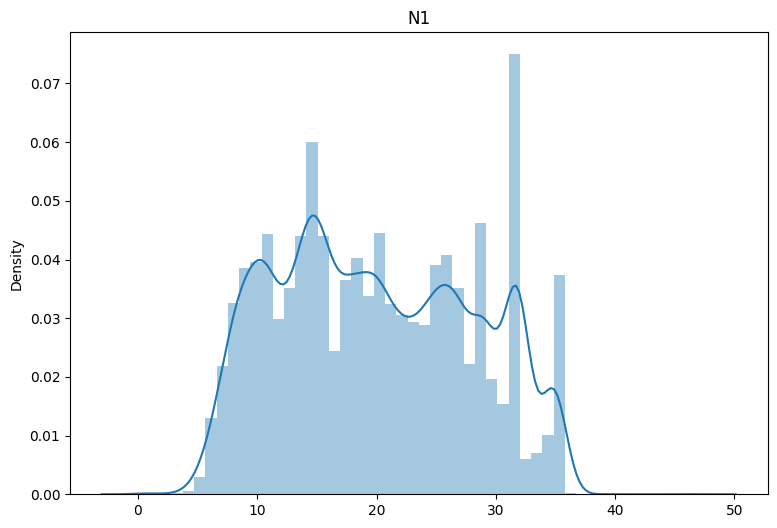

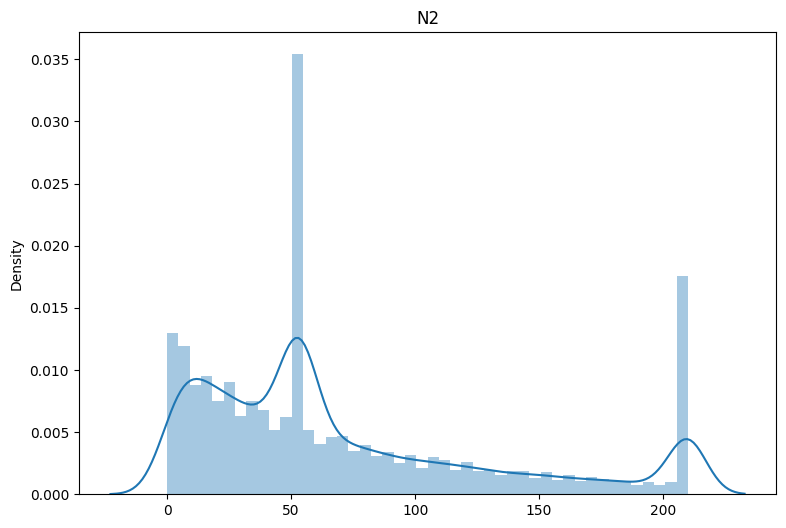

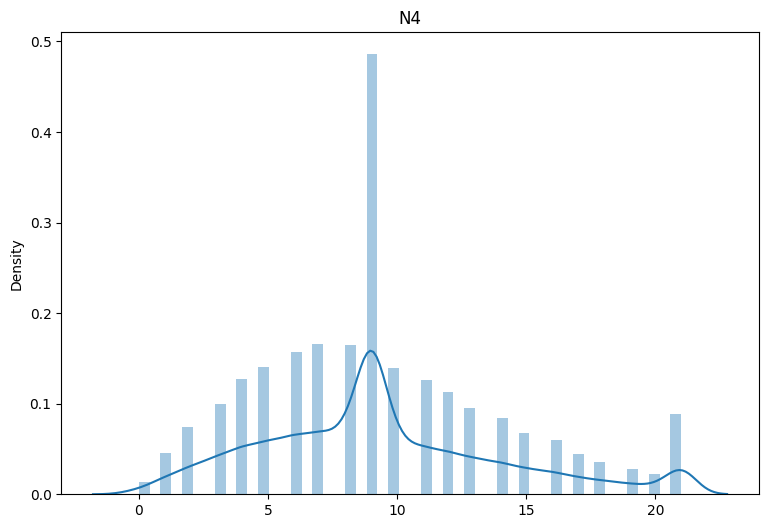

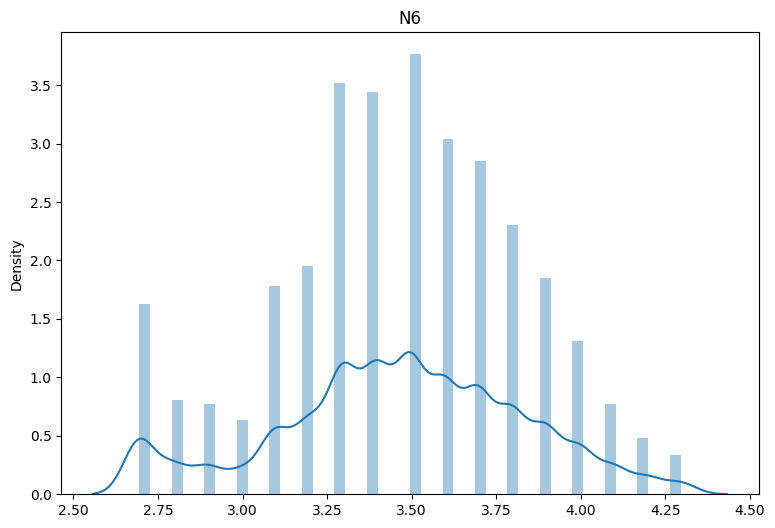

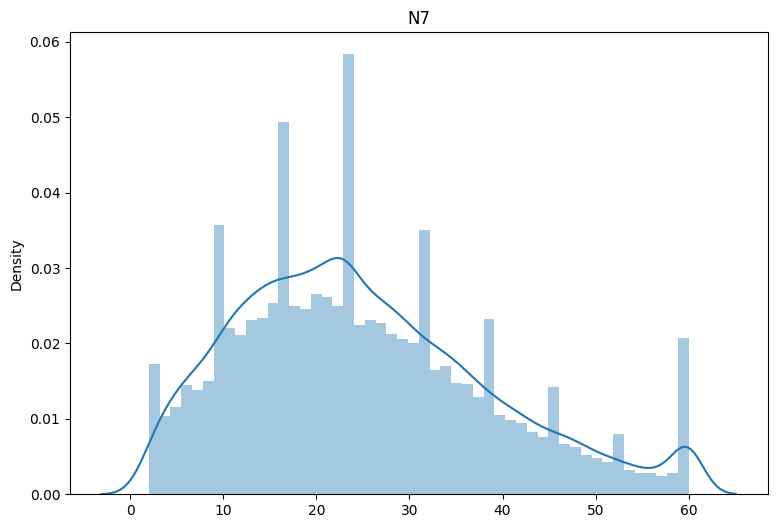

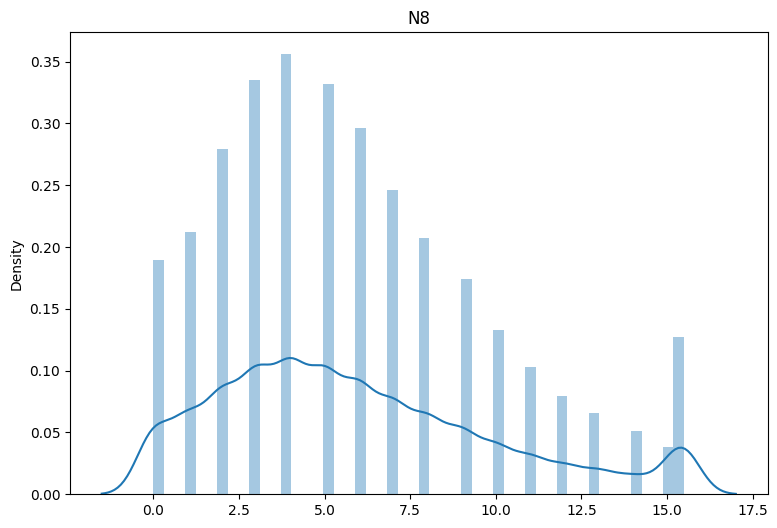

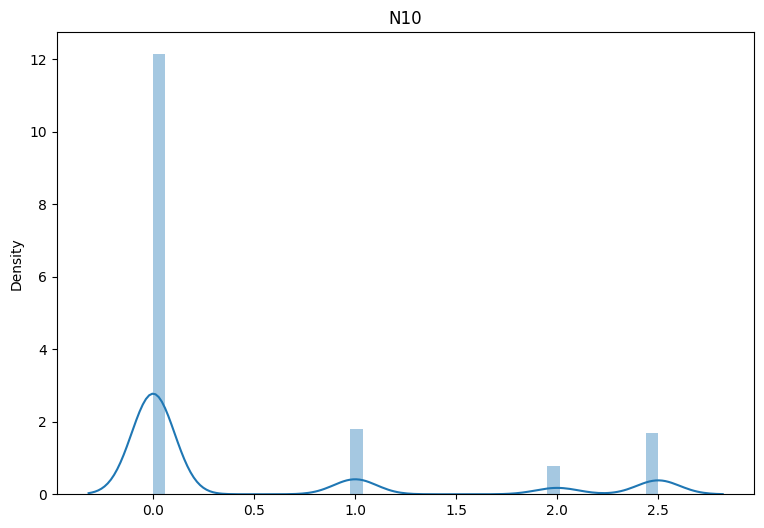

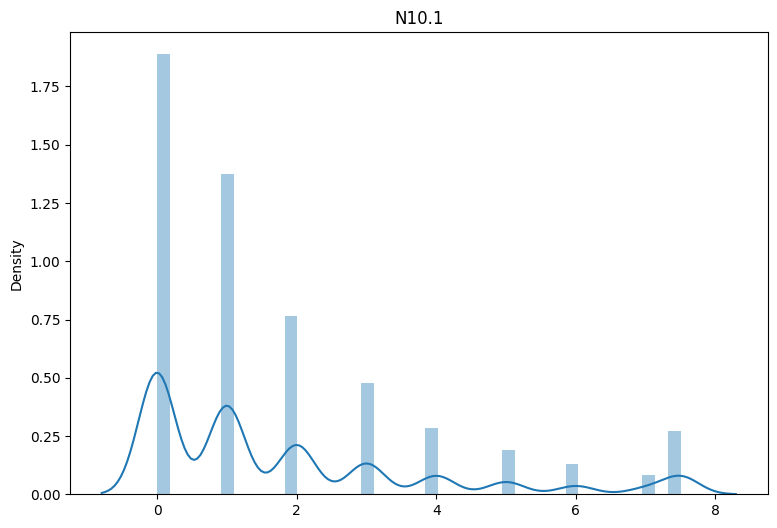

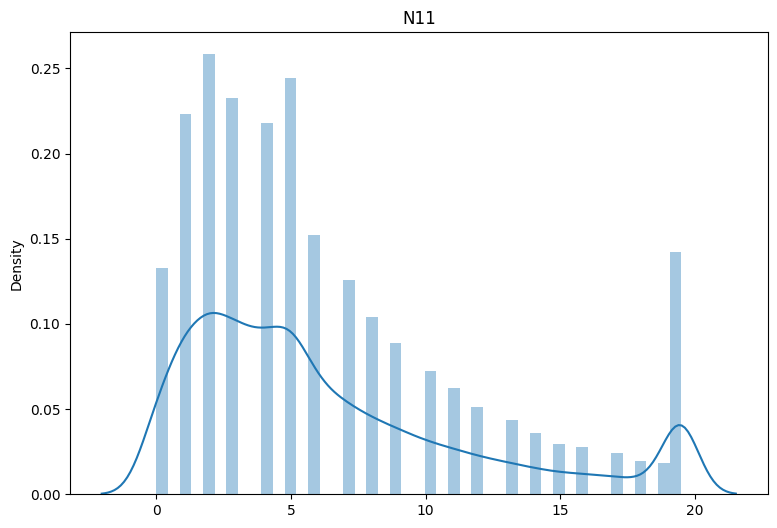

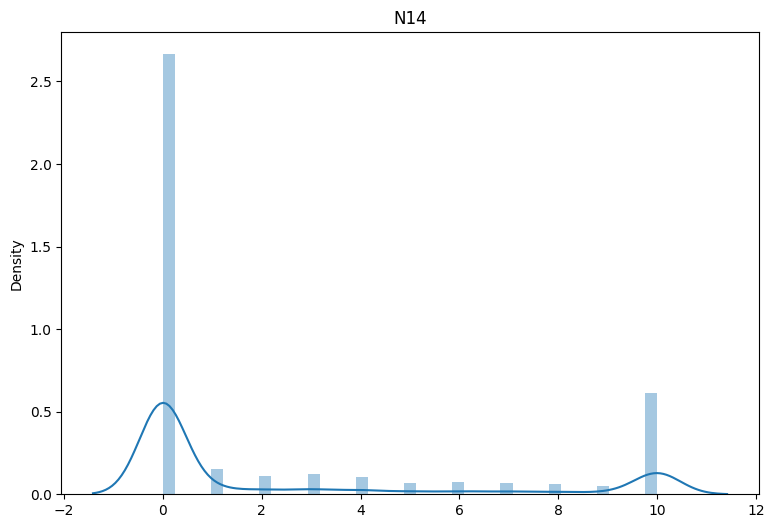

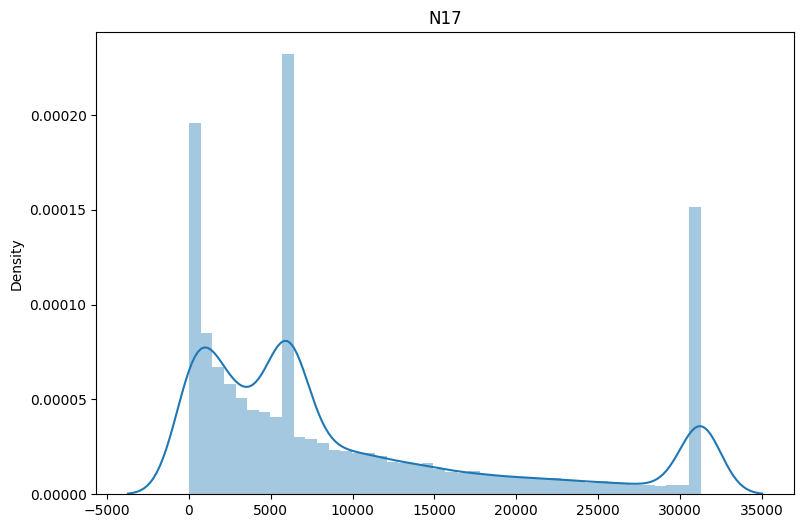

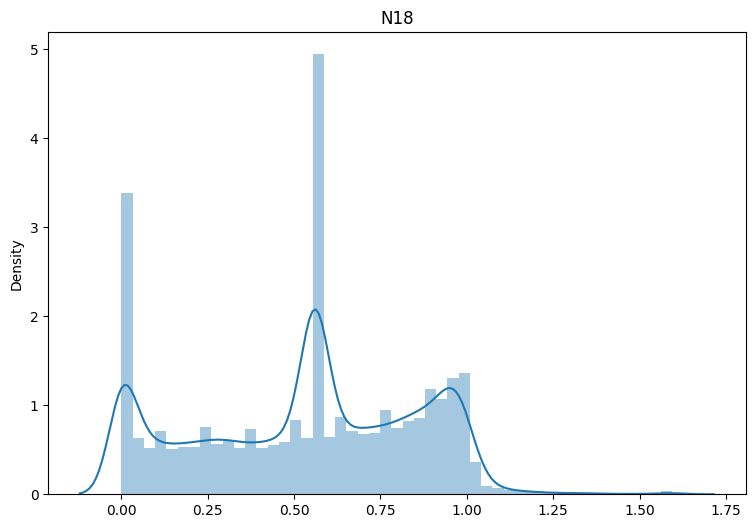

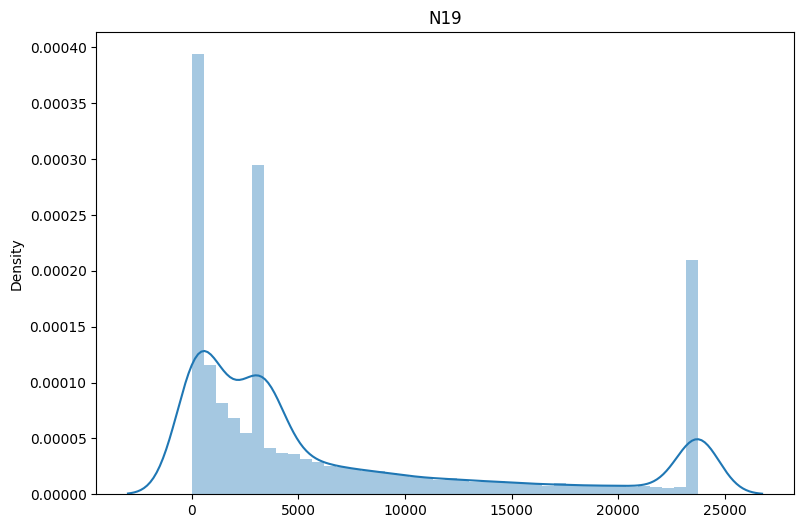

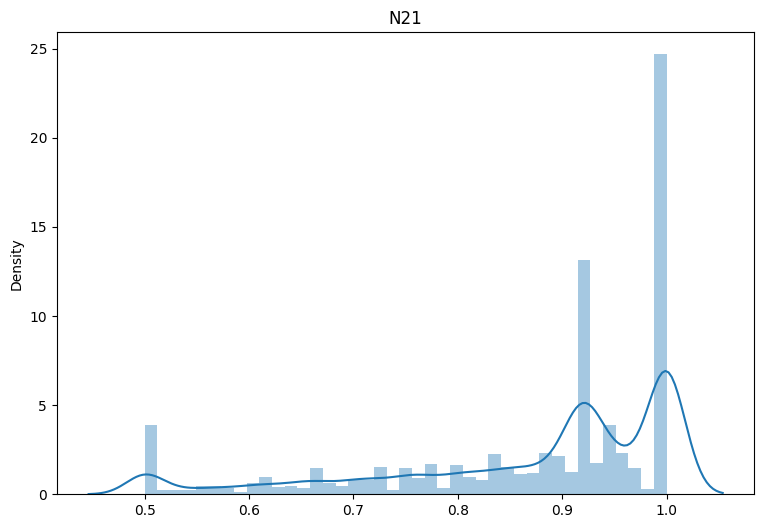

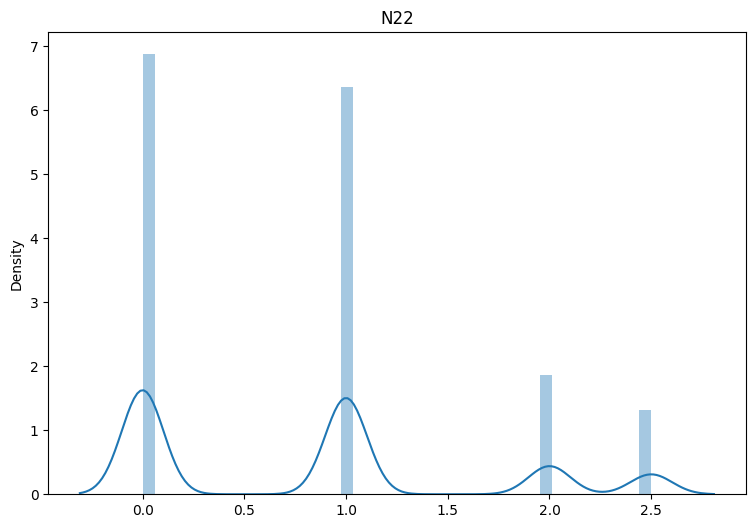

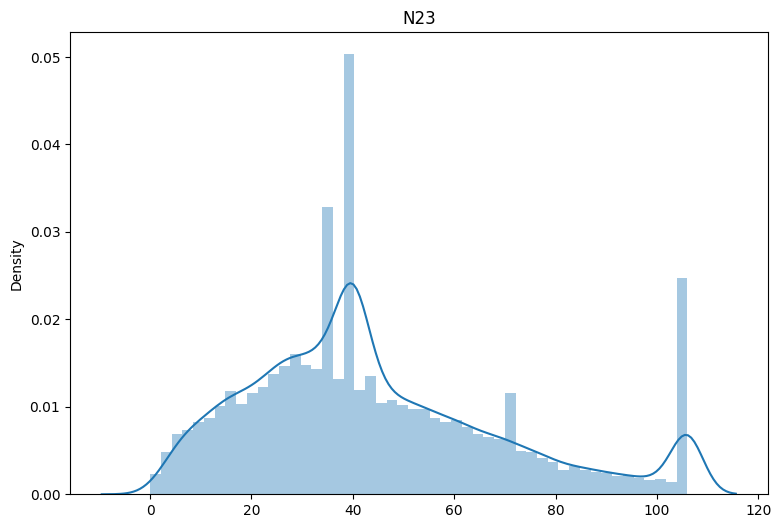

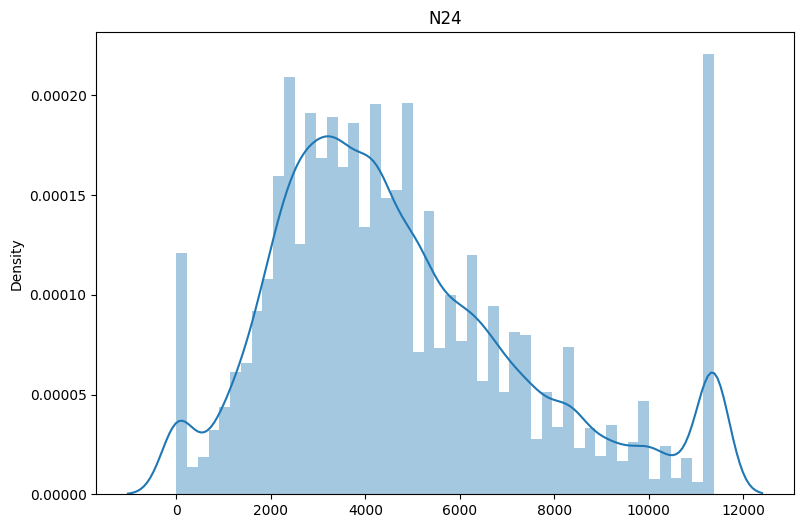

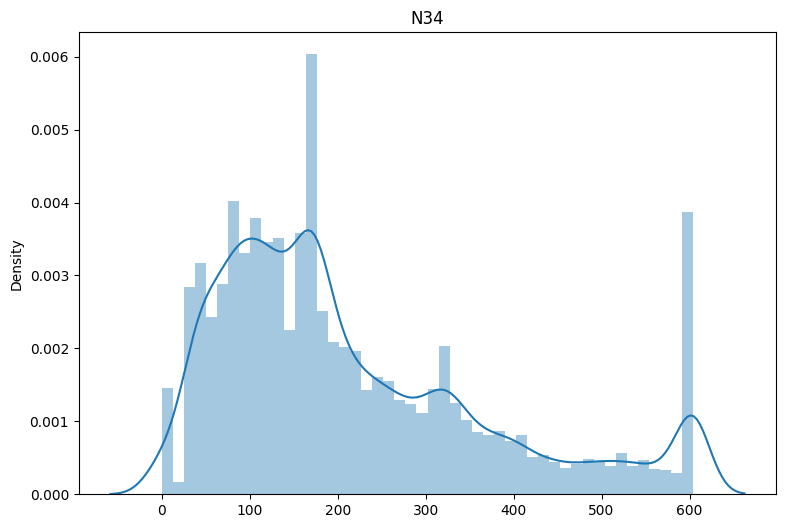

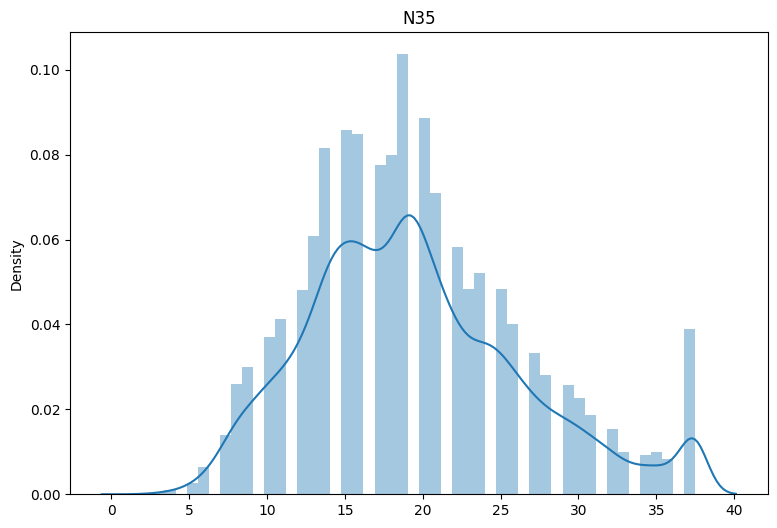

In [ ]:
import warnings
warnings.filterwarnings('ignore')

for col in N:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.distplot(x=train[col]).set(title=col)


In [ ]:
train[N].skew()

N1       0.155189
N2       1.063313
N4       0.581989
N6      -0.190093
N7       0.609951
N8       0.681590
N10      1.592407
N10.1    1.359120
N11      1.088514
N14      1.282114
N17      1.148890
N18     -0.145985
N19      1.204479
N21     -1.213386
N22      0.624161
N23      0.782629
N24      0.756431
N34      1.037966
N35      0.560706
dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

# train.drop('Unique_ID',axis=1,inplace=Tru"e)
train['Dependent_Variable'].value_counts()
train=train[N+c+['Dependent_Variable']]
train.head()

N1     N2    N4     N6    N7    N8  N10  N10.1   N11   N14  ...   N35  \
0  23.75   53.0   9.0  2.695  10.0   0.0  2.0    7.5   5.0   0.0  ...  12.0   
1  11.05   22.0  16.0  3.795  19.0   4.0  0.0    5.0   9.0   0.0  ...  17.0   
2  29.00   53.0   9.0  2.695  17.0   2.0  2.5    3.0  19.0  10.0  ...  18.0   
3  17.99    1.0   4.0  3.595   6.0   5.0  0.0    0.0   0.0   0.0  ...  27.0   
4  27.50  206.0  11.0  3.895  31.0  10.0  0.0    1.0   4.0   0.0  ...  21.0   

   C1  C2  C3  C4  C5     C6  C7    C8  Dependent_Variable  
0   1   0  11  31   0  False   0  True                   1  
1   1   4   2  66   2  False   1  True                   0  
2   1   0  19   2   0  False   0  True                   1  
3   1   1  16  47   1  False   4  True                   0  
4   1   1  13   1   1   True   6  True                   0  

[5 rows x 28 columns]

In [ ]:
enc=LabelEncoder()

for i in train.columns:
  if i not in N or i!='Dependent_Variable':
    train[i]=enc.fit_transform(train[i])

In [ ]:
from sklearn.model_selection import train_test_split
X=train.drop('Dependent_Variable',axis=1)
Y=train['Dependent_Variable']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
X.head()


N1   N2  N4  N6  N7  N8  N10  N10.1  N11  N14  ...   N34  N35  C1  C2  \
0  1390   53   9   0   8   0    2      8    5    0  ...  3633   10   0   0   
1   407   22  16  11  17   4    0      5    9    0  ...  8353   15   0   4   
2  1720   53   9   0  15   2    3      3   19   10  ...  1021   16   0   0   
3   972    1   4   9   4   5    0      0    0    0  ...  4172   25   0   1   
4  1632  206  11  12  29  10    0      1    4    0  ...  6911   19   0   1   

   C3  C4  C5  C6  C7  C8  
0  11  31   0   0   0   1  
1   2  66   2   0   1   1  
2  19   2   0   0   0   1  
3  16  47   1   0   4   1  
4  13   1   1   1   6   1  

[5 rows x 27 columns]

In [ ]:
from imblearn.combine import SMOTETomek

smote = SMOTETomek(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [ ]:
Y_train.value_counts()

0    15035
1    15035
Name: Dependent_Variable, dtype: int64

In [ ]:
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
imbalance_ratio = (15954 / 7181)

# Set class weights
class_weights = {0: 1.0, 1: 1.0 / imbalance_ratio}
clf=LogisticRegression(class_weight=class_weights)
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid=GridSearchCV(clf,param_grid=param_grid,cv=10)
grid.fit(X_train,Y_train)



GridSearchCV(cv=10,
             estimator=LogisticRegression(class_weight={0: 1.0,
                                                        1: 0.45010655634950486}),
             param_grid={'C': [0.1, 1.0, 10.0], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [ ]:
best_params = grid.best_params_
best_score = grid.best_score_

# Train the model with the best parameters
best_classifier = LogisticRegression(random_state=42, **best_params,class_weight=class_weights)
best_classifier.fit(X_train, Y_train)

# Evaluate the model on the test set
test_accuracy = best_classifier.score(X_test, Y_test)

In [ ]:
y_pred=best_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82      6890
           1       0.60      0.32      0.41      3025

    accuracy                           0.73      9915
   macro avg       0.67      0.61      0.62      9915
weighted avg       0.70      0.73      0.70      9915



In [ ]:


importances=best_classifier.coef_
best_params

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

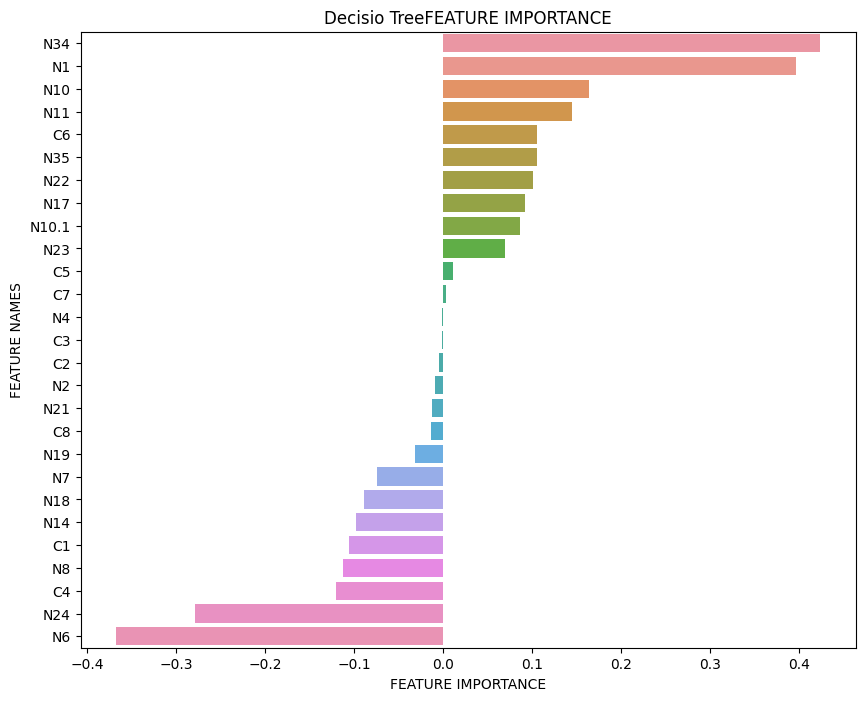

In [ ]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

#Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
  plt.figure(figsize=(10,8))
#Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')


importances=best_classifier.coef_
best_params
plot_feature_importance(importances[0],X.columns,'Decisio Tree')

In [ ]:
selected=['N34','N1','N10','N11','C6','N35','N22','N17','N10.1','N23','C5','C7']
X_train_selected=X_train[selected]
X_test_selected=X_test[selected]
X_train_selected


N34    N1  N10  N11  C6  N35  N22    N17  N10.1  N23  C5  C7
0       8261   336    0   10   1   16    1   2224      1  207   2   2
1      12068   909    0    8   1   18    0  13255      0  559   1   2
2       1960  1720    3    8   0   17    1   5003      1  207   0   0
3      10340   411    0    2   1   25    3  10572      1  298   2   2
4      12428  1336    3    4   0   24    0   1607      0  523   2   2
...      ...   ...  ...  ...  ..  ...  ...    ...    ...  ...  ..  ..
30065   4997  1600    0    3   0   17    0   2075      0  190   1   4
30066   9259  1601    0   19   1   20    1  13255      7  553   2   1
30067   5146   300    0   12   0   17    0    527      2  292   2   0
30068   4893  1625    1    7   0    7    2     46      1  410   1   4
30069   8283  1828    1    7   0   12    1   5003      2  475   0   0

[30070 rows x 12 columns]

In [ ]:
Y_train.shape

(30070,)

In [ ]:
std=StandardScaler()
X_train_selected=std.fit_transform(X_train_selected)
X_test_selected=std.transform(X_test_selected)

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

classifier1 = LogisticRegression()
classifier2 = DecisionTreeClassifier()
classifier3 = SVC()

# Create the Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[('lr', classifier1), ('dt', classifier2), ('svm', classifier3)],
    voting='hard'
)

# Define the parameter grid for tuning
# param_grid = {
#     'lr__C': [0.1, 1, 10],
#     'dt__max_depth':
#     [None, 5, 10],
#     'svm__C': [0.1, 1, 10]
# }

# grid=GridSearchCV(voting_classifier,param_grid=param_grid,cv=5)
voting_classifier.fit(X_train_selected,Y_train)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()), ('svm', SVC())])

In [ ]:
y_pred=voting_classifier.predict(X_test_selected)
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.93      0.82      6890
           1       0.60      0.25      0.35      3025

    accuracy                           0.72      9915
   macro avg       0.67      0.59      0.59      9915
weighted avg       0.70      0.72      0.68      9915



In [ ]:


# Train the model with the best parameters
best_classifier = GradientBoostingClassifier(random_state=42)
best_classifier.fit(X_train_selected, Y_train)

# Evaluate the model on the test set
test_accuracy = best_classifier.score(X_test_selected, Y_test)
y_pred=best_classifier.predict(X_test_selected)
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.92      0.82      6890
           1       0.62      0.30      0.40      3025

    accuracy                           0.73      9915
   macro avg       0.68      0.61      0.61      9915
weighted avg       0.71      0.73      0.70      9915



In [ ]:
from sklearn.model_selection import cross_val_score
classifier = SVC()

# Perform 5-fold cross-validation and evaluate accuracy
scores = cross_val_score(classifier,X_train_selected,Y_train, cv=5, scoring='f1')


In [ ]:
scores

array([0.33865157, 0.32820513, 0.32365145, 0.3255814 , 0.34390993])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

clf=RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid=GridSearchCV(clf,param_grid=param_grid,cv=10)
grid.fit(X_train,Y_train)



KeyboardInterrupt: ignored

In [ ]:


# Train the model with the best parameters
best_classifier = RandomForestClassifier(random_state=42, n_estimators=100,max_depth=10,min_samples_leaf=4,min_samples_split=5)
best_classifier.fit(X_train, Y_train)

# Evaluate the model on the test set
test_accuracy = best_classifier.score(X_test, Y_test)

In [ ]:
y_pred=best_classifier.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76      6890
           1       0.49      0.61      0.54      3025

    accuracy                           0.68      9915
   macro avg       0.65      0.66      0.65      9915
weighted avg       0.71      0.68      0.69      9915



In [ ]:
# param_grid = {
#     'learning_rate': [0.1, 0.01],
#     'n_estimators': [100, 200],
#     'max_depth': [3, 5],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]

# }


# clf=XGBClassifier()


# grid=GridSearchCV(clf,param_grid=param_grid,cv=10)
# grid.fit(X_train,Y_train)
# best_params = grid.best_params_

from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Train the model with the best parameters
best_classifier = ExtraTreesClassifier()
best_classifier.fit(X_train, Y_train)

# Evaluate the model on the test set
test_accuracy = best_classifier.score(X_test, Y_test)
y_pred=best_classifier.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))


In [ ]:
sns.pairplot(train[N+['Dependent_Variable']],hue='Dependent_Variable')

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fd1f4e0d2d0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Create a KNN classifier objectq
knn = KNeighborsClassifier()

# Define the range of K values to evaluate
k_values = range(1, 31)

# Initialize a list to store the cross-validation scores
cv_scores = []

# Perform cross-validation for each K value
train_score=[]
test_score=[]
d={}
for k in range(1,21):
    KNN = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean' )
    KNN.fit(X_train, Y_train)
    train_score.append(KNN.score(X_train, Y_train))
    test_score.append(KNN.score(X_test, Y_test))



KeyboardInterrupt: ignored

In [ ]:

sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
plt.plot(range(1,51),test_score,color='blue', linestyle='dashed', marker='*',markerfacecolor='red', markersize=10, label="Test Accuracy")

plt.plot(range(1,51),train_score,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10, label="Test Accuracy")
plt.show()

In [ ]:

KNN = KNeighborsClassifier(n_neighbors= 11
                           , metric = 'manhattan' )
KNN.fit(X_train,Y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11)

In [ ]:
y_pred=KNN.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.60      0.68      6890
           1       0.41      0.62      0.49      3025

    accuracy                           0.61      9915
   macro avg       0.60      0.61      0.59      9915
weighted avg       0.67      0.61      0.62      9915



In [ ]:
X_train.shape

(30070, 27)

In [ ]:
from sklearn.tree import *
ET = ExtraTreeClassifier()
ET.fit(X_train,Y_train)

ExtraTreeClassifier()

In [ ]:
y_pred=ET.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70      6890
           1       0.39      0.51      0.44      3025

    accuracy                           0.61      9915
   macro avg       0.57      0.58      0.57      9915
weighted avg       0.64      0.61      0.62      9915



In [ ]:
from sklearn.naive_bayes import GaussianNB
ET = GaussianNB()
ET.fit(X_train,Y_train)
y_pred=ET.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.63      0.70      6890
           1       0.43      0.65      0.52      3025

    accuracy                           0.63      9915
   macro avg       0.62      0.64      0.61      9915
weighted avg       0.69      0.63      0.65      9915



In [ ]:


clf=GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
grid=GridSearchCV(clf,param_grid=param_grid,cv=10)
grid.fit(X_train,Y_train)


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]})

In [ ]:
best_params = grid.best_params_
best_score = grid.best_score_

# Train the model with the best parameters
best_classifier = GaussianNB( **best_params)
best_classifier.fit(X_train, Y_train)

# Evaluate the model on the test set
test_accuracy = best_classifier.score(X_test, Y_test)
y_pred=best_classifier.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.63      0.70      6890
           1       0.43      0.65      0.52      3025

    accuracy                           0.63      9915
   macro avg       0.62      0.64      0.61      9915
weighted avg       0.69      0.63      0.65      9915



<h1>Other approch

In [44]:
train1=train

In [45]:
train1.head()

Unique_ID  C1  C2  C3  C4  C5     C6  C7    C8     N1  ...  N27  N28  \
0   Candidate_5926   1   0  11  31   0  False   0  True  23.75  ...  NaN  NaN   
1  Candidate_48134   1   4   2  66   2  False   1  True  11.05  ...  NaN  NaN   
2  Candidate_51717   1   0  19   2   0  False   0  True  29.00  ...  NaN  NaN   
3  Candidate_26401   1   1  16  47   1  False   4  True  17.99  ...  NaN  NaN   
4  Candidate_34872   1   1  13   1   1   True   6  True  27.50  ...  NaN  NaN   

   N29  N30  N31  N32    N33     N34   N35  Dependent_Variable  
0  NaN  NaN  NaN  NaN   58.0  113.39  12.0                   1  
1  NaN  NaN  NaN  NaN  160.0  262.10  17.0                   0  
2  NaN  NaN  NaN  NaN   24.0   50.29  18.0                   1  
3  NaN  NaN  NaN  NaN   70.0  126.52  27.0                   0  
4  NaN  NaN  NaN  NaN  100.0  205.47  21.0                   0  

[5 rows x 45 columns]

In [46]:
train1.shape

(33050, 45)

In [47]:
for i in train1.columns:
  print(i,train[i].unique())

Unique_ID ['Candidate_5926' 'Candidate_48134' 'Candidate_51717' ...
 'Candidate_36027' 'Candidate_3169' 'Candidate_4714']
C1 [1 2 3]
C2 [ 0  4  1  6  3  9  2  7 11 13  5 18 15 14 19 16 20 12  8 10 17]
C3 [11  2 19 16 13 30 41 34 35 17  7  5  6  1  0 15  3 23 31 29 28 26  8 43
 12  9  4 22 14 36 20 33 38 24 46 10 50 37 18 42 25 27 48 21 32 40 44 51
 39 47 49 45]
C4 [31 66  2 47  1 13  0 17 35 10 11 12 15 50  4 16 18 19 61 41 14 62 27 42
  5 29 26  6 28 32  9 38 20 58 40 37 30  7 55 46 57 48 60 59 23 43  8  3
 34 54 22 25 33 39 24 52 63 36 21 64 44 45 51 49 53 65 56 67]
C5 [0 2 1 5 4 6 7 3]
C6 [False  True]
C7 [0 1 4 6 2 7 3 5]
C8 [ True False]
N1 [23.75 11.05 29.   ... 10.47 22.29 18.12]
N2 [ nan  22.   1. 206.  14.  27.   8.  10.   5.  95. 224. 108.  16.  61.
   6.  12. 232.  15. 151.  13.  11.  69. 283.  43.   0.  30.  64. 157.
  36.  19.   9.  26.   7.  96. 207.  47.  24. 281.  72.  74. 153.  67.
  34. 192. 106.  62.  32.  29. 109. 242. 215.   4.  21. 133.  80.  46.
 124.  92.  90. 1

In [48]:
train1.isnull().sum()

Unique_ID                 0
C1                        0
C2                        0
C3                        0
C4                        0
C5                        0
C6                        0
C7                        0
C8                        0
N1                        0
N2                     4612
N3                      365
N4                     4606
N5                     4606
N6                      365
N7                      427
N8                        0
N9                        0
N10                     427
N10.1                   427
N11                     716
N12                    4614
N14                     608
N15                     427
N16                    4606
N17                    4606
N18                    4606
N19                    4571
N20                    4571
N21                    4571
N22                    4571
N23                    2486
N24                       0
N25                   26779
N26                   26779
N27                 

In [49]:
drop_N=['N'+str(i) for i in range(25,33)]
train1.drop(drop_N+['Unique_ID'],axis=1,inplace=True)

In [50]:
for i in train1.columns:
  train1[i]=train1[i].fillna(train1[i].median())

In [51]:

train1.isnull().sum()

C1                    0
C2                    0
C3                    0
C4                    0
C5                    0
C6                    0
C7                    0
C8                    0
N1                    0
N2                    0
N3                    0
N4                    0
N5                    0
N6                    0
N7                    0
N8                    0
N9                    0
N10                   0
N10.1                 0
N11                   0
N12                   0
N14                   0
N15                   0
N16                   0
N17                   0
N18                   0
N19                   0
N20                   0
N21                   0
N22                   0
N23                   0
N24                   0
N33                   0
N34                   0
N35                   0
Dependent_Variable    0
dtype: int64

In [52]:
N=[i for i in train1.columns if i[0]!='C']
C=[i for i in train1.columns if i[0]!='N']

train1[N].describe().T

count          mean           std     min          25%  \
N1                  33050.0     19.976530      8.110870   0.000    13.450000   
N2                  33050.0     77.387595     79.821874   0.000    25.000000   
N3                  33050.0      3.359809      0.408786   0.000     3.200000   
N4                  33050.0      9.494070      5.184803   0.000     6.000000   
N5                  33050.0      8.301331      4.639205   0.000     5.000000   
N6                  33050.0      3.454809      0.408786   0.095     3.295000   
N7                  33050.0     25.201120     14.184573   2.000    15.000000   
N8                  33050.0      6.082723      4.535870   0.000     3.000000   
N9                  33050.0    325.585870    452.149358   0.000    60.000000   
N10                 33050.0      0.891710      2.620115   0.000     0.000000   
N10.1               33050.0      2.030560      3.153727   0.000     0.000000   
N11                 33050.0      7.062995      8.219784   0.000     2.000000   
N12                 33050.0    874.175613   6261.727134   0.000     0.000000   
N14                 33050.0      4.454281     10.530076   0.000     0.000000   
N15                 33050.0      0.325870      0.794821   0.000     0.000000   
N16                 33050.0      0.019970      0.162883   0.000     0.000000   
N17                 33050.0  14462.238759  31769.407526   0.000  2178.000000   
N18                 33050.0      0.533240      0.324917   0.000     0.270000   
N19                 33050.0   9974.436278  20641.700322   0.000   779.000000   
N20                 33050.0     21.520151     11.562434   0.000    14.000000   
N21                 33050.0      0.865884      0.162064   0.000     0.800000   
N22                 33050.0      0.919365      1.140207   0.000     0.000000   
N23                 33050.0     57.046817    144.964934   0.000    26.000000   
N24                 33050.0   5050.306727   6237.726330   0.000  2833.333333   
N33                 33050.0    125.629394    104.391919  20.000    54.000000   
N34                 33050.0    224.313536    186.513844   0.000    98.740000   
N35                 33050.0     19.579667      7.305315   2.000    15.000000   
Dependent_Variable  33050.0      0.308805      0.462007   0.000     0.000000   

                            50%         75%           max  
N1                    19.275000     26.9000  4.800000e+01  
N2                    53.000000     99.0000  7.550000e+02  
N3                     3.400000      3.6000  4.400000e+00  
N4                     9.000000     12.0000  5.900000e+01  
N5                     8.000000     10.0000  5.100000e+01  
N6                     3.495000      3.6950  4.495000e+00  
N7                    23.000000     33.0000  1.290000e+02  
N8                     5.000000      8.0000  5.100000e+01  
N9                   183.000000    420.0000  1.498500e+04  
N10                    0.000000      1.0000  8.300000e+01  
N10.1                  1.000000      3.0000  1.050000e+02  
N11                    5.000000      9.0000  3.790000e+02  
N12                    0.000000      0.0000  4.447450e+05  
N14                    0.000000      4.0000  9.900000e+01  
N15                    0.000000      0.0000  3.000000e+01  
N16                    0.000000      0.0000  7.000000e+00  
N17                 6073.000000  13829.0000  1.435667e+06  
N18                    0.560000      0.8000  5.830000e+00  
N19                 3352.000000   9972.7500  6.462850e+05  
N20                   20.000000     27.0000  1.140000e+02  
N21                    0.920000      1.0000  1.000000e+00  
N22                    1.000000      1.0000  2.000000e+01  
N23                   40.000000     58.0000  2.002000e+03  
N24                 4166.666667   6250.0000  6.185478e+05  
N33                   90.000000    160.0000  7.000000e+02  
N34                  172.600000    300.9475  2.153380e+03  
N35                   19.000000     24.0000  6.400000e+01  
Dependent_Variable   

In [53]:
train1['Dependent_Variable'].value_counts()

0    22844
1    10206
Name: Dependent_Variable, dtype: int64

In [54]:
# for i in N[:-1]:
#   if i in ['N3','N6','N21']:
#     train1[i]=np.log(train1[i]+1)
#   else:
#     train1[i]=np.sqrt(train1[i])

<ipython-input-55-57bd5975ee3f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[i],ax=axs[c, 0])
<ipython-input-55-57bd5975ee3f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1[i],ax=axs[c, 1])
<ipython-input-55-57bd5975ee3f>:4: UserWarning: 

`distplot` is a deprecated function 

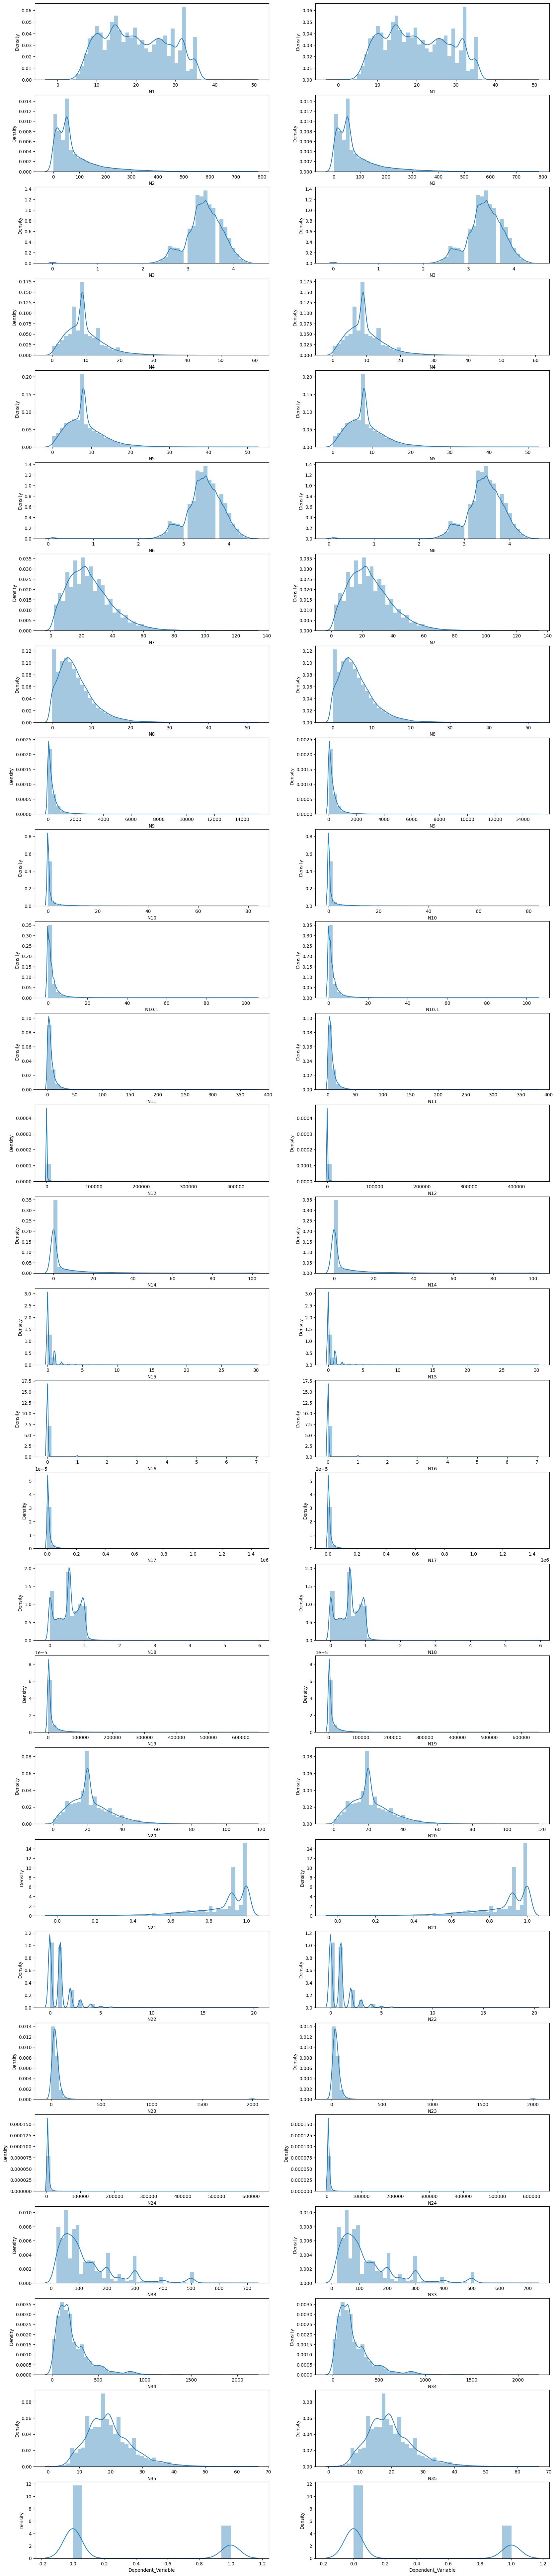

In [55]:
fig, axs = plt.subplots(len(N), 2, figsize=(20,100))
c=0
for i in N:
  sns.distplot(train1[i],ax=axs[c, 0])

# Plot the second histogram in the top-right subplot
  sns.distplot(train1[i],ax=axs[c, 1])
  c+=1


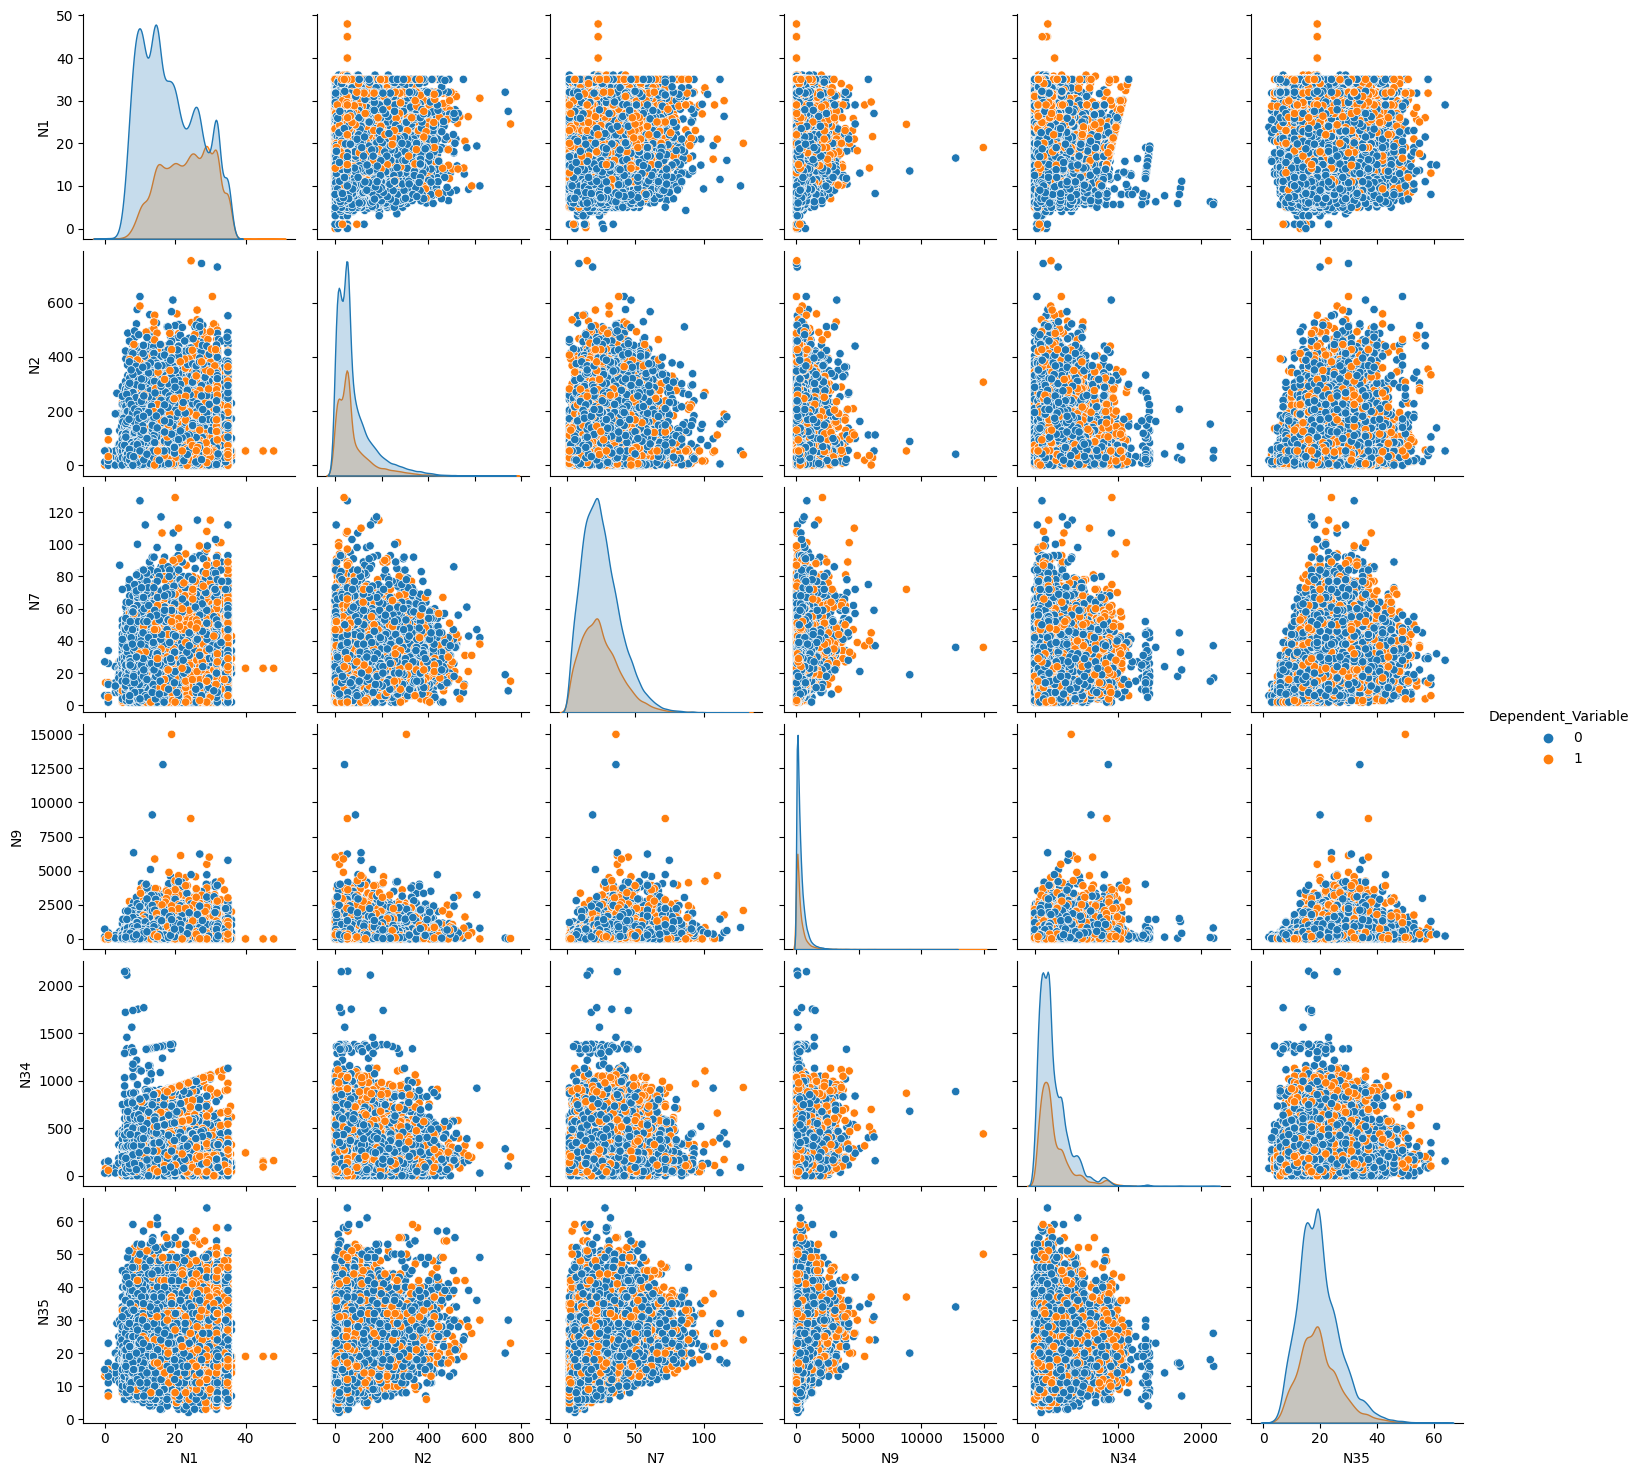

In [56]:
sns.pairplot(data=train1[['N1','N2','N7','N9','N34','N35','Dependent_Variable']],hue='Dependent_Variable')

<Axes: >

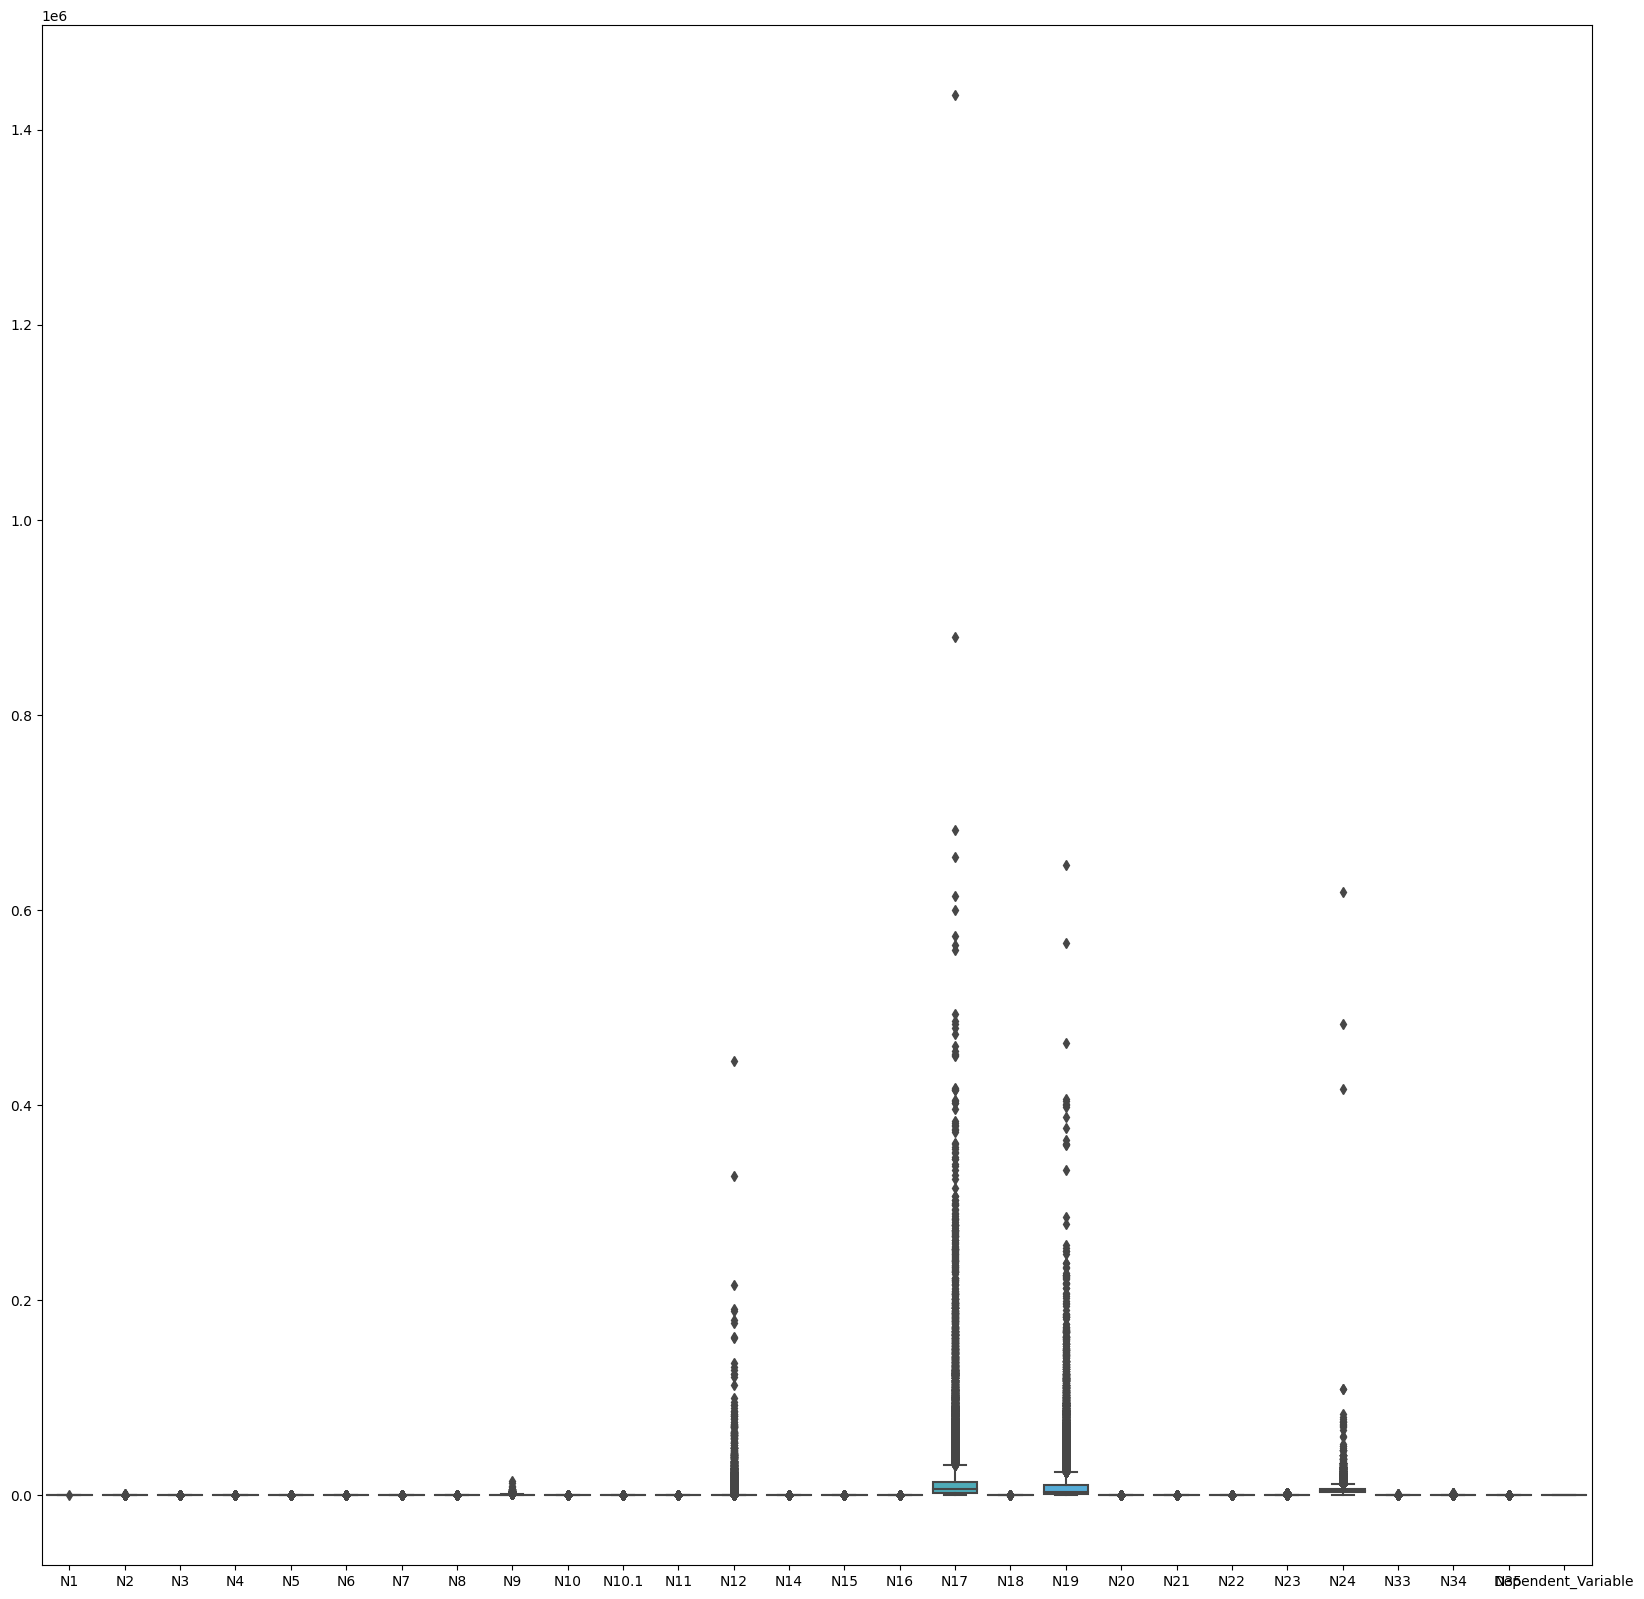

In [57]:

plt.figure(figsize=(20,20))
sns.boxplot(train1[N])


In [58]:
def outlier_capping(col):
  q1=np.percentile(col,25)
  q3=np.percentile(col,75)
  iqr=q3-q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  re=[]
  for i in col:
    if i>upper_bound or i<lower_bound:
      re.append(upper_bound)
    elif i<lower_bound:
      re.append(lower_bound)
    else:
      re.append(i)
  return re
for i in N:
  train[i]=outlier_capping(train[i])

<Axes: >

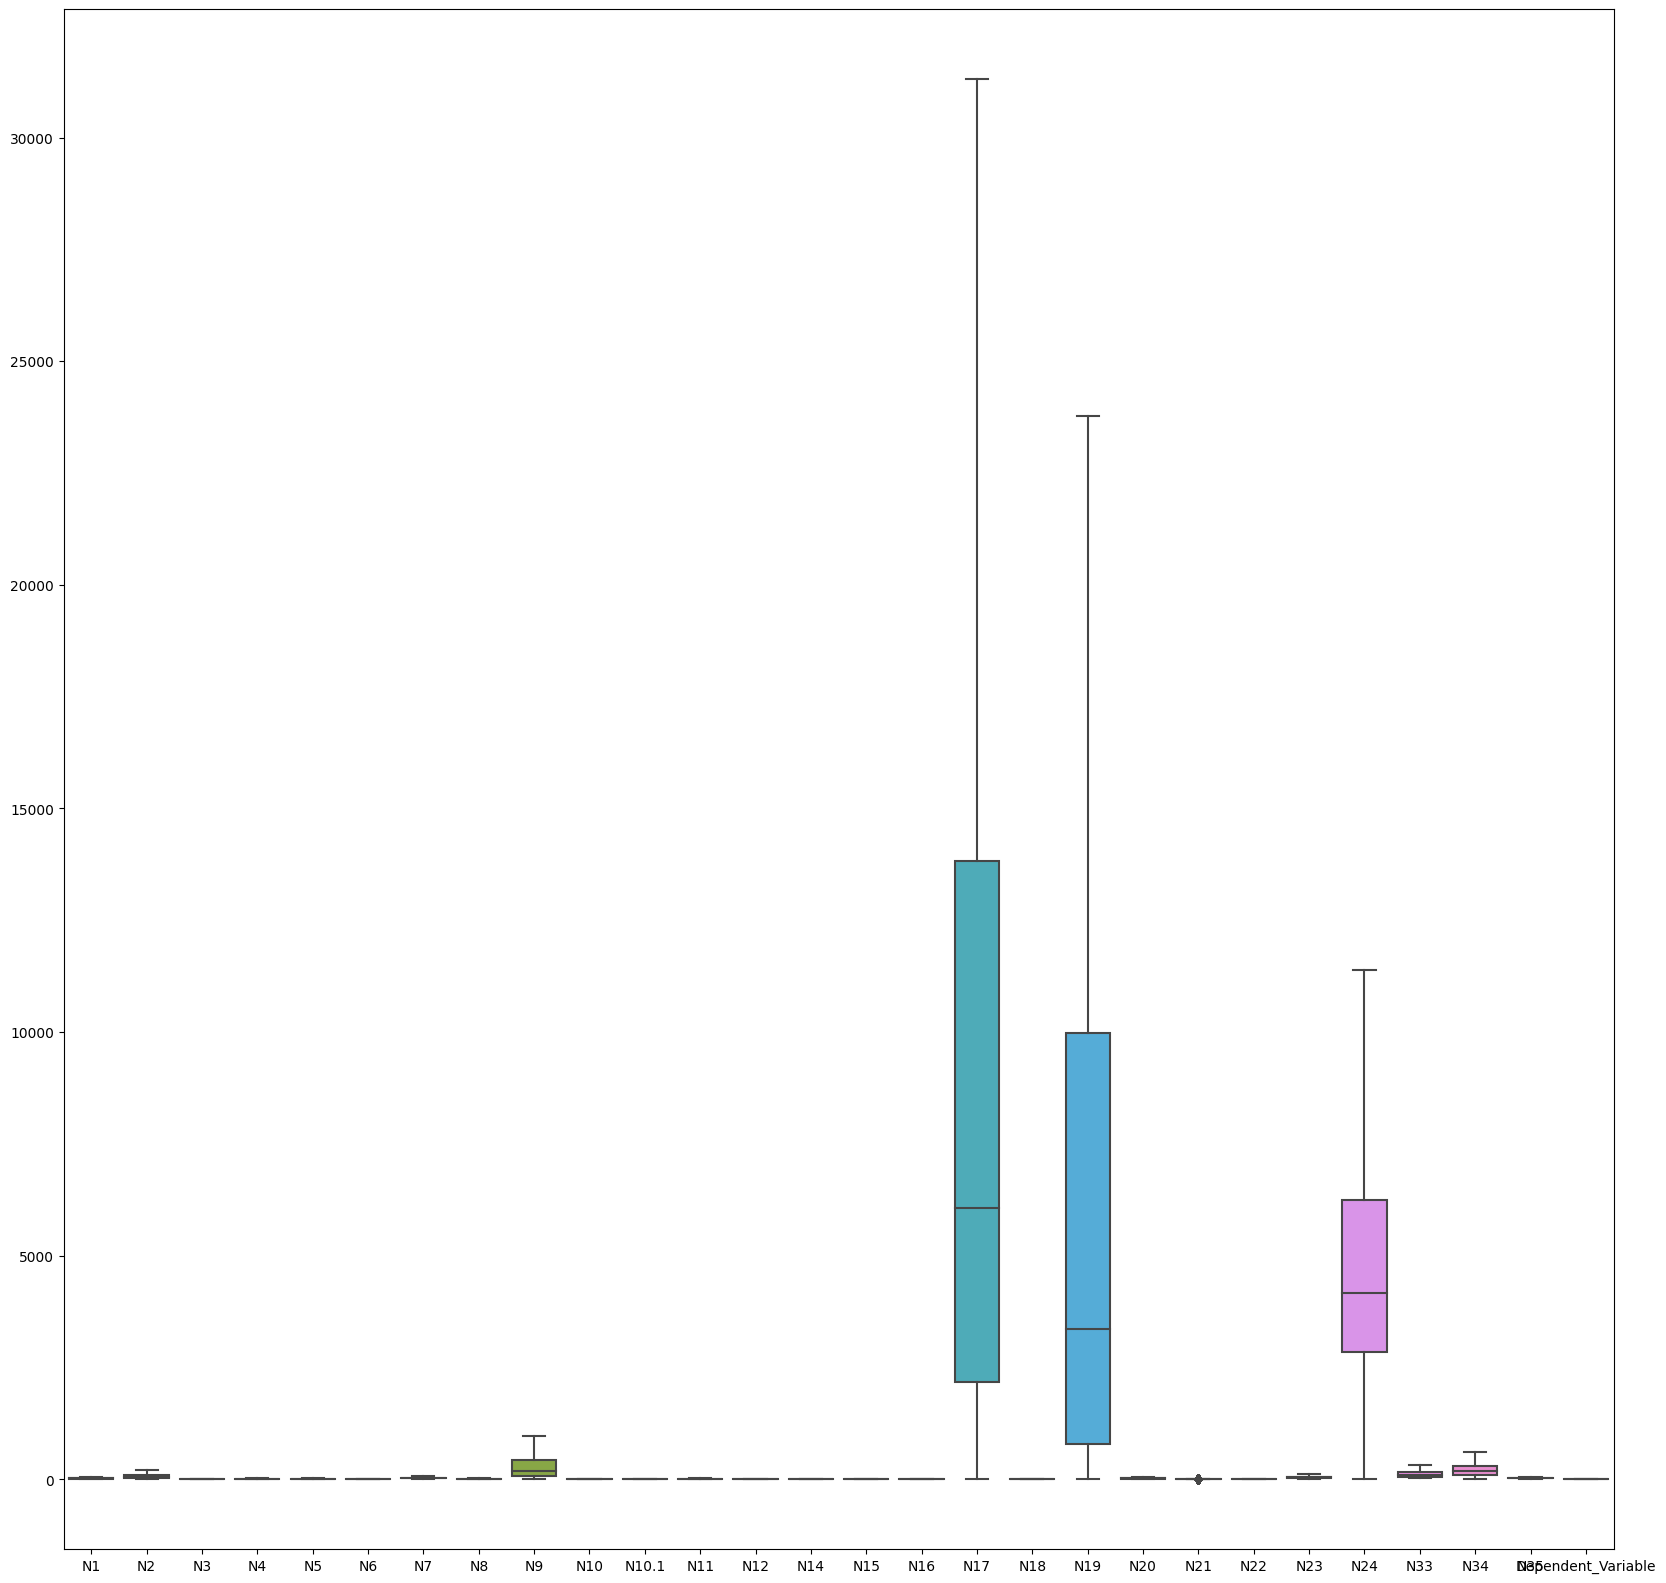

In [59]:

plt.figure(figsize=(20,20))
sns.boxplot(train1[N])


In [60]:
for i in train1.columns:
  print(i,train[i].unique())

C1 [1 2 3]
C2 [ 0  4  1  6  3  9  2  7 11 13  5 18 15 14 19 16 20 12  8 10 17]
C3 [11  2 19 16 13 30 41 34 35 17  7  5  6  1  0 15  3 23 31 29 28 26  8 43
 12  9  4 22 14 36 20 33 38 24 46 10 50 37 18 42 25 27 48 21 32 40 44 51
 39 47 49 45]
C4 [31 66  2 47  1 13  0 17 35 10 11 12 15 50  4 16 18 19 61 41 14 62 27 42
  5 29 26  6 28 32  9 38 20 58 40 37 30  7 55 46 57 48 60 59 23 43  8  3
 34 54 22 25 33 39 24 52 63 36 21 64 44 45 51 49 53 65 56 67]
C5 [0 2 1 5 4 6 7 3]
C6 [False  True]
C7 [0 1 4 6 2 7 3 5]
C8 [ True False]
N1 [23.75 11.05 29.   ... 10.47 22.29 18.12]
N2 [ 53.  22.   1. 206.  14.  27.   8.  10.   5.  95. 210. 108.  16.  61.
   6.  12.  15. 151.  13.  11.  69.  43.   0.  30.  64. 157.  36.  19.
   9.  26.   7.  96. 207.  47.  24.  72.  74. 153.  67.  34. 192. 106.
  62.  32.  29. 109.   4.  21. 133.  80.  46. 124.  92.  90. 161.  35.
 194. 105. 100.  93. 123.  84.  89.  38. 179. 154. 115.  23.  20.  51.
  48. 102.  54. 122. 132.  17. 120.   3. 104.  25.  87.  58.  57.  3

In [61]:
droping=['N12','N15','N16']


In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):

    X = train1[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [63]:

compute_vif(N[:-1]).sort_values(by='VIF',ascending=False)

<ipython-input-62-0b67d9b38382>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Variable        VIF
2        N3        inf
5        N6        inf
4        N5  12.841073
3        N4  12.677668
24      N33  10.663649
25      N34  10.390898
19      N20   6.177567
8        N9   5.532157
6        N7   5.169090
16      N17   4.748610
7        N8   4.167938
18      N19   2.480961
11      N11   2.227330
10    N10.1   2.212835
17      N18   2.044556
23      N24   1.913849
22      N23   1.859291
13      N14   1.678831
9       N10   1.539085
0        N1   1.486414
26      N35   1.374999
21      N22   1.264078
1        N2   1.176324
20      N21   1.113098
12      N12        NaN
14      N15        NaN
15      N16        NaN

In [64]:
# Drop N3,N6
N.remove('N3')
N.remove('N6')
droping+=['N3','N6']

In [65]:
compute_vif(N[:-1]).sort_values(by='VIF',ascending=False)

<ipython-input-62-0b67d9b38382>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Variable        VIF
3        N5  12.810489
2        N4  12.664680
22      N33  10.655538
23      N34  10.390834
17      N20   6.111143
6        N9   5.532156
4        N7   5.149335
14      N17   4.744983
5        N8   4.132735
16      N19   2.361700
8     N10.1   2.211936
9       N11   2.209912
15      N18   2.018980
21      N24   1.913763
20      N23   1.847345
11      N14   1.664250
7       N10   1.537302
0        N1   1.459245
24      N35   1.373506
19      N22   1.262947
1        N2   1.175709
18      N21   1.098447
10      N12        NaN
12      N15        NaN
13      N16        NaN

In [66]:
N.remove('N5')
droping+=['N5']
compute_vif(N[:-1]).sort_values(by='VIF',ascending=False)

<ipython-input-62-0b67d9b38382>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Variable        VIF
21      N33  10.654210
22      N34  10.386964
16      N20   6.111065
5        N9   5.510335
3        N7   5.119554
13      N17   4.713333
2        N4   4.284750
4        N8   3.686802
15      N19   2.349198
7     N10.1   2.209815
8       N11   2.209550
14      N18   2.009998
20      N24   1.896785
19      N23   1.835333
10      N14   1.664235
6       N10   1.519022
0        N1   1.458182
23      N35   1.369511
18      N22   1.262892
1        N2   1.175694
17      N21   1.098161
9       N12        NaN
11      N15        NaN
12      N16        NaN

In [67]:
N.remove('N33')
droping+=['N33']
compute_vif(N[:-1]).sort_values(by='VIF',ascending=False)

<ipython-input-62-0b67d9b38382>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Variable       VIF
16      N20  6.109877
5        N9  5.510334
3        N7  5.119497
13      N17  4.713329
2        N4  4.284292
4        N8  3.686728
15      N19  2.345524
8       N11  2.209548
7     N10.1  2.209044
14      N18  2.009983
20      N24  1.895199
19      N23  1.833555
10      N14  1.664179
6       N10  1.518577
0        N1  1.373965
22      N35  1.369501
21      N34  1.290965
18      N22  1.262793
1        N2  1.175162
17      N21  1.097831
9       N12       NaN
11      N15       NaN
12      N16       NaN

In [68]:
N.remove('N20')
droping+=['N20']
compute_vif(N[:-1]).sort_values(by='VIF',ascending=False)

<ipython-input-62-0b67d9b38382>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Variable       VIF
5        N9  5.501492
13      N17  4.662893
2        N4  3.703741
4        N8  3.636371
15      N19  2.339274
8       N11  2.209349
7     N10.1  2.208160
3        N7  2.114954
14      N18  2.009945
19      N24  1.894151
18      N23  1.818578
10      N14  1.662736
6       N10  1.518016
0        N1  1.373790
21      N35  1.362129
20      N34  1.288769
17      N22  1.262192
1        N2  1.146912
16      N21  1.090257
9       N12       NaN
11      N15       NaN
12      N16       NaN

In [69]:
N.remove('N9')
droping+=['N9']
compute_vif(N[:-1]).sort_values(by='VIF',ascending=False)

<ipython-input-62-0b67d9b38382>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Variable       VIF
2        N4  3.583809
4        N8  2.907931
12      N17  2.422220
14      N19  2.321339
7       N11  2.209282
6     N10.1  2.207322
3        N7  2.113207
13      N18  2.009913
18      N24  1.784109
17      N23  1.674470
9       N14  1.656230
5       N10  1.516360
0        N1  1.371269
20      N35  1.357374
19      N34  1.287950
16      N22  1.258007
1        N2  1.146811
15      N21  1.090049
8       N12       NaN
10      N15       NaN
11      N16       NaN

In [70]:
# Droping afeature in dropping list
train1.drop(droping,axis=1,inplace=True)

In [71]:
train1.head()

C1  C2  C3  C4  C5     C6  C7    C8     N1     N2  ...      N17   N18  \
0   1   0  11  31   0  False   0  True  23.75   53.0  ...   6073.0  0.56   
1   1   4   2  66   2  False   1  True  11.05   22.0  ...   1944.0  0.06   
2   1   0  19   2   0  False   0  True  29.00   53.0  ...   6073.0  0.56   
3   1   1  16  47   1  False   4  True  17.99    1.0  ...   8244.0  0.89   
4   1   1  13   1   1   True   6  True  27.50  206.0  ...  31305.5  0.97   

         N19   N21  N22     N23           N24     N34   N35  \
0   3352.000  0.92  1.0  27.816   1750.000000  113.39  12.0   
1  23763.375  0.88  1.0  40.000  10833.333330  262.10  17.0   
2   3352.000  0.92  1.0  20.000   6250.000000   50.29  18.0   
3   1006.000  1.00  0.0  26.000   2413.666667  126.52  27.0   
4   3398.000  0.96  0.0  44.000   7666.666667  205.47  21.0   

   Dependent_Variable  
0                   1  
1                   0  
2                   1  
3                   0  
4                   0  

[5 rows x 27 columns]

In [72]:
# class_1=train1.loc[train1['Dependent_Variable']==0].sample(n=7000,random_state=42)
# class_2=train1.loc[train['Dependent_Variable']==1].sample(n=7000,random_state=42)
# sampled_train1=pd.concat([class_1,class_2],axis=0)
sampled_train1=train1
sampled_train1

C1  C2  C3  C4  C5     C6  C7    C8     N1     N2  ...      N17   N18  \
0       1   0  11  31   0  False   0  True  23.75   53.0  ...   6073.0  0.56   
1       1   4   2  66   2  False   1  True  11.05   22.0  ...   1944.0  0.06   
2       1   0  19   2   0  False   0  True  29.00   53.0  ...   6073.0  0.56   
3       1   1  16  47   1  False   4  True  17.99    1.0  ...   8244.0  0.89   
4       1   1  13   1   1   True   6  True  27.50  206.0  ...  31305.5  0.97   
...    ..  ..  ..  ..  ..    ...  ..   ...    ...    ...  ...      ...   ...   
33045   1   1  14  41   2  False   6  True  15.50   19.0  ...  16762.0  0.68   
33046   1   6  10   1   2   True   2  True  32.20   42.0  ...   6551.0  0.86   
33047   1   1   2   4   2  False   6  True   8.99  137.0  ...   7809.0  0.27   
33048   1   0   0   0   0  False   0  True  15.00   53.0  ...   6073.0  0.56   
33049   1   6   8  14   1  False   4  True  26.99  130.0  ...    174.0  0.34   

             N19   N21  N22     N23           N24     N34   N35  \
0       3352.000  0.92  1.0  27.816   1750.000000  113.39  12.0   
1      23763.375  0.88  1.0  40.000  10833.333330  262.10  17.0   
2       3352.000  0.92  1.0  20.000   6250.000000   50.29  18.0   
3       1006.000  1.00  0.0  26.000   2413.666667  126.52  27.0   
4       3398.000  0.96  0.0  44.000   7666.666667  205.47  21.0   
...          ...   ...  ...     ...           ...     ...   ...   
33045   7661.000  1.00  0.0  18.000   7000.000000  349.07   8.0   
33046    868.000  0.63  2.0  42.000   4420.000000   87.33  19.0   
33047  20105.000  0.75  0.0  18.000   6971.833333   63.59  20.0   
33048   3352.000  0.92  1.0  40.000   2537.916667   41.60  17.0   
33049    326.000  1.00  0.0  18.000   2500.000000  204.10  11.0   

       Dependent_Variable  
0                       1  
1                       0  
2                       1  
3                       0  
4                       0  
...                   ...  
33045                   0  
33046                   0  
33047                   0  
33048                   1  
33049                   1  

[33050 rows x 27 columns]

In [73]:
from sklearn.preprocessing import StandardScaler,LabelEncoder


In [74]:
enc=LabelEncoder()

for i in sampled_train1.columns:
  if i not in N or i!='Dependent_Variable':
    sampled_train1[i]=enc.fit_transform(sampled_train1[i])

In [75]:
sampled_train1

C1  C2  C3  C4  C5  C6  C7  C8    N1   N2  ...    N17  N18    N19  N21  \
0       0   0  11  31   0   0   0   1  1390   53  ...   5003   56   2968   41   
1       0   4   2  66   2   0   1   1   407   22  ...   1799    6  10484   37   
2       0   0  19   2   0   0   0   1  1720   53  ...   5003   56   2968   41   
3       0   1  16  47   1   0   4   1   972    1  ...   6380   89    993   48   
4       0   1  13   1   1   1   6   1  1632  206  ...  13255   97   3000   45   
...    ..  ..  ..  ..  ..  ..  ..  ..   ...  ...  ...    ...  ...    ...  ...   
33045   0   1  14  41   2   0   6   1   772   19  ...  10177   68   5701   48   
33046   0   6  10   1   2   1   2   1  1862   42  ...   5316   86    860   12   
33047   0   1   2   4   2   0   6   1   242  137  ...   6109   27   9769   24   
33048   0   0   0   0   0   0   0   1   732   53  ...   5003   56   2968   41   
33049   0   6   8  14   1   0   4   1  1605  130  ...    170   34    326   48   

       N22  N23   N24    N34  N35  Dependent_Variable  
0        1  324   689   3633   10                   1  
1        1  469  5304   8353   15                   0  
2        1  232  4204   1021   16                   1  
3        0  298  1209   4172   25                   0  
4        0  488  4764   6911   19                   0  
...    ...  ...   ...    ...  ...                 ...  
33045    0  207  4529  10151    6                   0  
33046    2  484  3080   2469   17                   0  
33047    0  207  4524   1503   18                   0  
33048    1  469  1329    678   15                   1  
33049    0  207  1294   6866    9                   1  

[33050 rows x 27 columns]

In [76]:
from sklearn.model_selection import train_test_split
X=sampled_train1.drop('Dependent_Variable',axis=1)
Y=sampled_train1['Dependent_Variable']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
X.head()


C1  C2  C3  C4  C5  C6  C7  C8    N1   N2  ...  N14    N17  N18    N19  \
0   0   0  11  31   0   0   0   1  1390   53  ...    0   5003   56   2968   
1   0   4   2  66   2   0   1   1   407   22  ...    0   1799    6  10484   
2   0   0  19   2   0   0   0   1  1720   53  ...   10   5003   56   2968   
3   0   1  16  47   1   0   4   1   972    1  ...    0   6380   89    993   
4   0   1  13   1   1   1   6   1  1632  206  ...    0  13255   97   3000   

   N21  N22  N23   N24   N34  N35  
0   41    1  324   689  3633   10  
1   37    1  469  5304  8353   15  
2   41    1  232  4204  1021   16  
3   48    0  298  1209  4172   25  
4   45    0  488  4764  6911   19  

[5 rows x 26 columns]

In [77]:
from imblearn.combine import SMOTETomek

smote = SMOTETomek(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [78]:
Y_train.value_counts()

0    15033
1    15033
Name: Dependent_Variable, dtype: int64

In [79]:
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

In [85]:
def model(model,X_train,X_test,Y_train,Y_test,t):
  model.fit(X_train,Y_train)
  y_pred=model.predict(X_test)
  print(classification_report(Y_test,y_pred))
  if t==True:
    return model.coef_
  else:
    return model.feature_importances_

In [86]:
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.svm import SVC
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.tree import *

logit=model(LogisticRegression(),X_train,X_test,Y_train,Y_test,True)

              precision    recall  f1-score   support

           0       0.81      0.66      0.73      6890
           1       0.46      0.65      0.54      3025

    accuracy                           0.66      9915
   macro avg       0.63      0.65      0.63      9915
weighted avg       0.70      0.66      0.67      9915



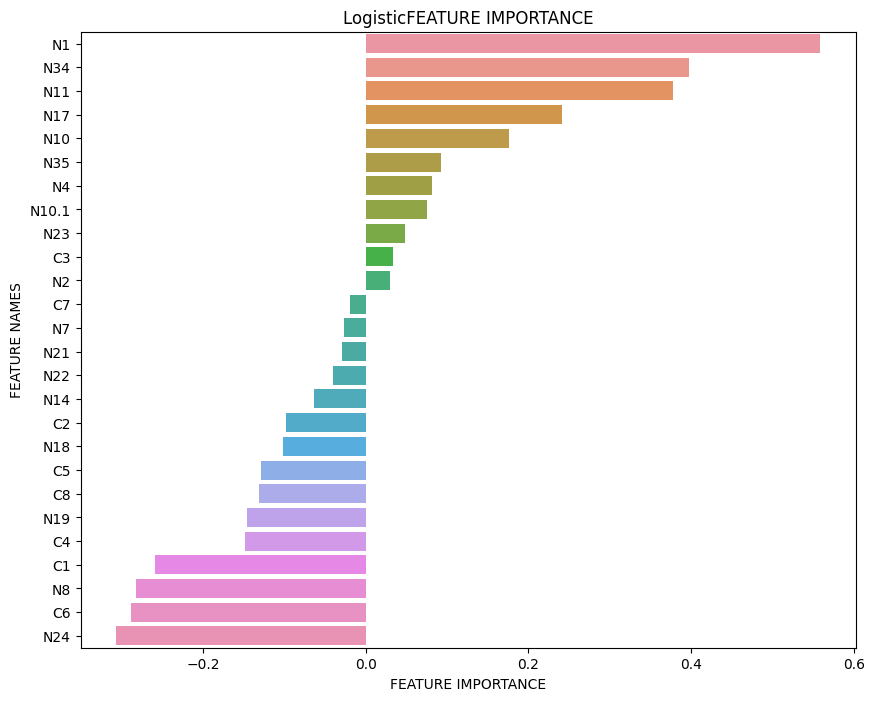

In [83]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

#Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
  plt.figure(figsize=(10,8))
#Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')


plot_feature_importance(logit[0],X.columns,'Logistic')

In [88]:
model(RandomForestClassifier(),X_train,X_test,Y_train,Y_test,'n')


              precision    recall  f1-score   support

           0       0.79      0.80      0.79      6890
           1       0.53      0.51      0.52      3025

    accuracy                           0.71      9915
   macro avg       0.66      0.66      0.66      9915
weighted avg       0.71      0.71      0.71      9915



1.00000001

In [89]:
model(DecisionTreeClassifier(),X_train,X_test,Y_train,Y_test,'n')

              precision    recall  f1-score   support

           0       0.75      0.69      0.72      6890
           1       0.40      0.48      0.44      3025

    accuracy                           0.62      9915
   macro avg       0.58      0.58      0.58      9915
weighted avg       0.64      0.62      0.63      9915



array([0.00686971, 0.04930714, 0.05422555, 0.05051865, 0.01221401,
       0.01207469, 0.01471351, 0.005439  , 0.1808747 , 0.04546274,
       0.02264932, 0.03923386, 0.03028468, 0.01060784, 0.0193425 ,
       0.03970015, 0.02049792, 0.03726583, 0.03211651, 0.04371031,
       0.03411933, 0.01050188, 0.04988631, 0.05431757, 0.07697428,
       0.04709201])

In [91]:
model(ExtraTreeClassifier(),X_train,X_test,Y_train,Y_test,'n')

              precision    recall  f1-score   support

           0       0.75      0.65      0.70      6890
           1       0.39      0.51      0.44      3025

    accuracy                           0.61      9915
   macro avg       0.57      0.58      0.57      9915
weighted avg       0.64      0.61      0.62      9915



array([0.01411736, 0.03229981, 0.04208125, 0.04125403, 0.02320976,
       0.02709333, 0.04406045, 0.0141007 , 0.10732398, 0.03616571,
       0.02813613, 0.04158713, 0.04120061, 0.02720892, 0.03559291,
       0.06520877, 0.03394305, 0.02943644, 0.03529383, 0.03663646,
       0.03663813, 0.02644655, 0.04888858, 0.04809268, 0.04723971,
       0.03674371])

In [93]:
from sklearn.svm import SVC
svc=model(SVC(),X_train,X_test,Y_train,Y_test,'n')

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      6890
           1       0.49      0.58      0.53      3025

    accuracy                           0.69      9915
   macro avg       0.65      0.66      0.65      9915
weighted avg       0.71      0.69      0.70      9915



AttributeError: ignored

In [ ]:
from xgboost import XGBClassifier
model(XGBClassifier(class_weight={0: 1, 1: 2}),X_train,X_test,Y_train,Y_test)

[21:52:20] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

              precision    recall  f1-score   support

           0       0.77      0.87      0.82      6890
           1       0.59      0.41      0.48      3025

    accuracy                           0.73      9915
   macro avg       0.68      0.64      0.65      9915
weighted avg       0.72      0.73      0.72      9915



In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_classifier = RandomForestClassifier(random_state=42,class_weight={0: 1, 1: 2})

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best parameters
model(RandomForestClassifier(random_state=42, **best_params,class_weight={0: 1, 1: 2}),X_train,X_test,
      Y_train,Y_test)


# Evaluate the model on the test set


KeyboardInterrupt: ignored

In [ ]:


param_grid = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],

}
clf = SVC(random_state=42,class_weight={0: 1, 1: 2})

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best parameters
model(SVC(random_state=42, **best_params,class_weight={0: 1, 1: 2}),X_train,X_test,
      Y_train,Y_test)



In [ ]:
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],

}
for i in ['C','kernel','gamma']:
  clf = SVC()


# Perform grid search cross-validation
  grid_search = GridSearchCV(estimator=clf, param_grid={i:param_grid[i]}, cv=5)
  grid_search.fit(X_train, Y_train)
  print(grid_search.best_params_)


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
for i in param_grid.keys():
  clf = RandomForestClassifier()


# Perform grid search cross-validation
  grid_search = GridSearchCV(estimator=clf, param_grid={i:param_grid[i]}, cv=5)
  grid_search.fit(X_train, Y_train)
  print(grid_search.best_params_)
